# RKKY interactions in $p$-wave superconductors
Let us now consider a system consisting of a $p$-wave superconductor with two magnetic impurities on. We will attempt to find some parameters which generates Yu–Shiba–Rusinov bound states while being somewhat realistic, such that hopefully we might find reasonable parameter sets that provide interesting RKKY interaction results.

## Preliminaries

Let's now disable repeated warnings, which usually pop out of libraries. They're annoying.

In [3]:
import warnings
warnings.filterwarnings('ignore')


First, let us import the common libraries that we need below.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm, trange

from bodge import *
from bodge.utils import ldos, pwave

Next, we also need to instantiate a lattice.
Let's try a 64x64 square lattice for parameter exploration to keep the simulations fast.
Later, we can scale up to 80x80 for our final simulations to keep things more realistic.

In [5]:
Lx = 64
Ly = 64
Lz = 1

lattice = CubicLattice((Lx, Ly, 1))

Let's now create some relevant $d$-vectors describing superconductors of interest. Note that the spin direction is not hugely important, so for now it's sufficient to just consider one type of $p_x$, $p_y$, and $p_x + ip_y$ situation. Later, we can also have a look at the non-unitary kind (at least two types to eliminate DOS effects), which is also quite interesting.

In [7]:
d_x = pwave("e_z * p_x")
d_y = pwave("e_z * p_y")
d_xy = pwave("e_z * (p_x + jp_y)")

## YSR states

### Basic definitions
Let's first create a function for visualizing the YSR state, since we'll do this a lot.

In [12]:
def plot_ysr(d, δ, Δ0, J0, μ):
    """Calculate the YSR state for a given d-vector."""
    # Prepare the base model.
    system = Hamiltonian(lattice)
    with system as (H, Δ, V):
        for i in lattice.sites():
            H[i, i] = -μ * σ0
        for i, j in lattice.bonds():
            H[i, j] = -1 * σ0
            Δ[i, j] = -Δ0 * d(i, j)

    # Prepare calculation points.
    ii = (Lx // 2, Ly // 2, 0)
    sites = [(ii[0] + δ, ii[1], ii[2])]
    energies = np.linspace(0.00, 2 * Δ0, 51)

    # Calculate the density of states without impurity.
    df0 = ldos(system, sites, energies)

    # Add the single impurity.
    with system as (H, Δ, V):
        H[ii, ii] = -μ * σ0 - J0 * σ3

    # Calculate the density of states with impurity.
    df1 = ldos(system, sites, energies)

    # Visualize the results.
    plt.figure()
    plt.plot(df0.ε / Δ0, df0.dos, df1.ε / Δ0, df1.dos)
    plt.xlabel(r"Energy $\epsilon/\Delta$")
    plt.ylabel(r"LDOS $N(\epsilon, x)$")
    plt.title(rf"$\delta = {δ}, \Delta = {Δ0}, J = {J0}$, µ = {µ}")
    plt.show()

### Reproduction
Let's start by confirming that we still get the same as last week for the initial parameters we selected. Note that I've changed the normalization of $J$ by 1/2.

LDOS: 100%|██████████| 51/51 [00:08<00:00,  5.70ε/s]


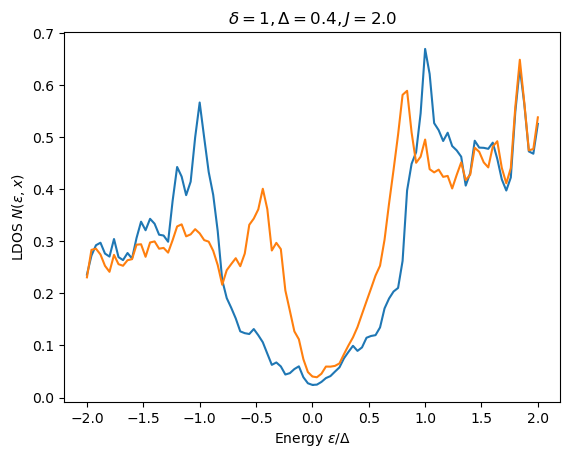

LDOS: 100%|██████████| 51/51 [00:08<00:00,  5.70ε/s]


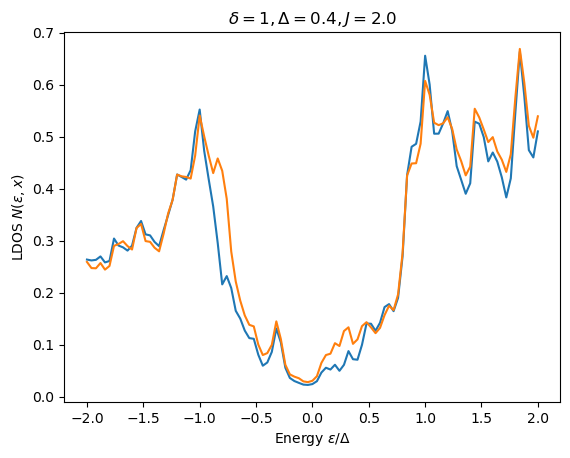

LDOS: 100%|██████████| 51/51 [00:08<00:00,  5.68ε/s]


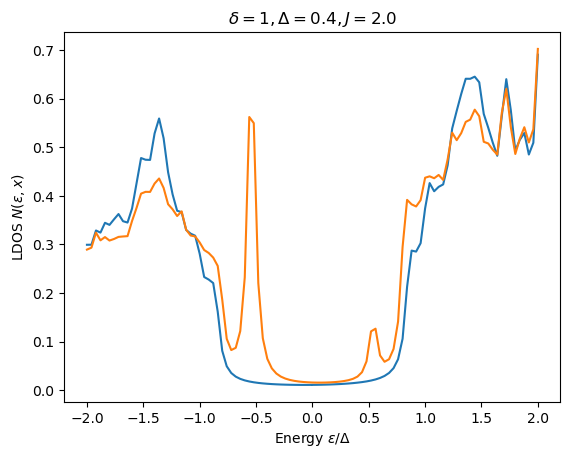

In [6]:
Δ0 = 0.4
J0 = 2.0
μ = -0.9

for d in [d_x, d_y, d_xy]:
    plot_ysr(d, 1, Δ0, J0, μ)

### Constraining Δ for fixed J
We know that we can select $J \gg \Delta$, so let's try that. We want to minimize the $Δ$ required to see a significant effect while letting $J$ become large but not insane. First, let's look at $d_x$, since that's the bottleneck.

LDOS: 100%|██████████| 51/51 [00:09<00:00,  5.64ε/s]


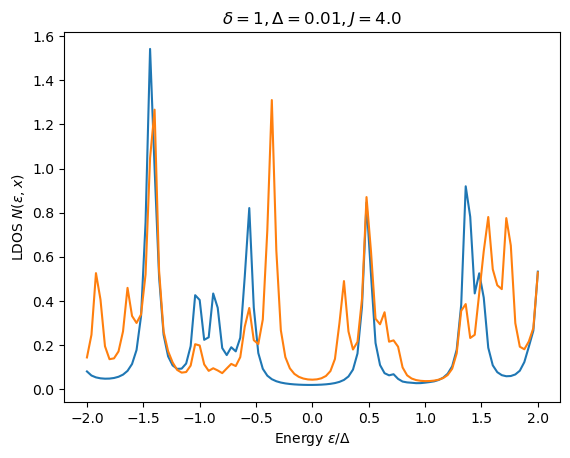

LDOS: 100%|██████████| 51/51 [00:09<00:00,  5.65ε/s]


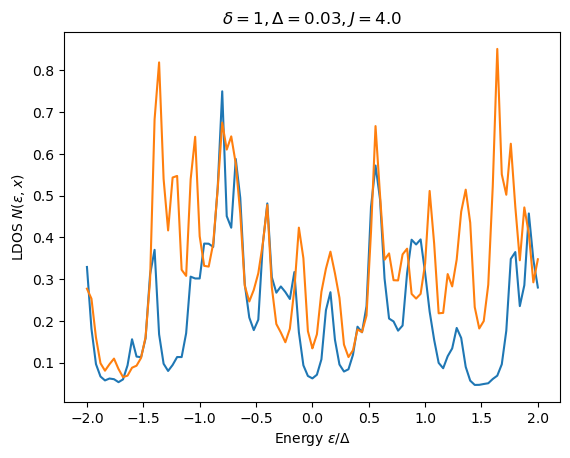

LDOS: 100%|██████████| 51/51 [00:09<00:00,  5.66ε/s]


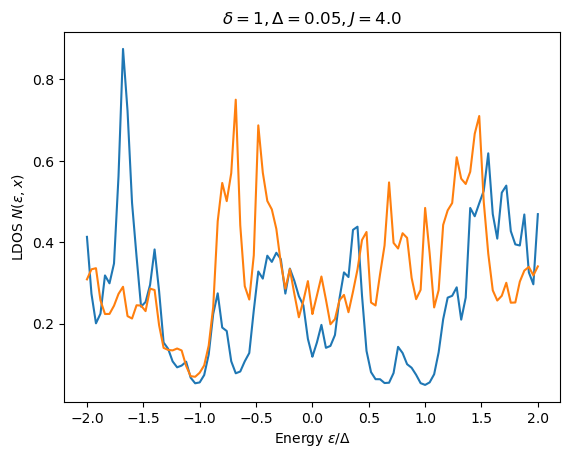

LDOS: 100%|██████████| 51/51 [00:08<00:00,  5.70ε/s]


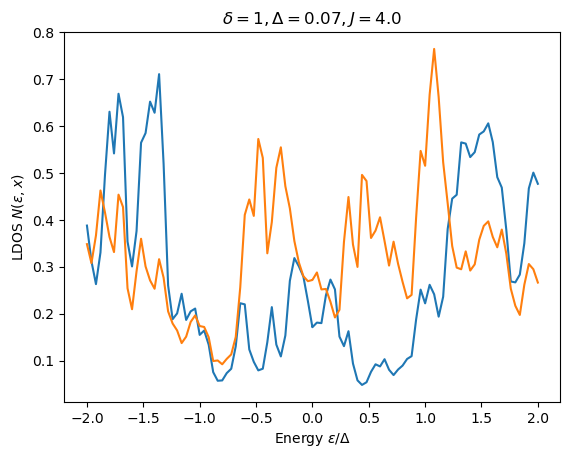

LDOS: 100%|██████████| 51/51 [00:08<00:00,  5.80ε/s]


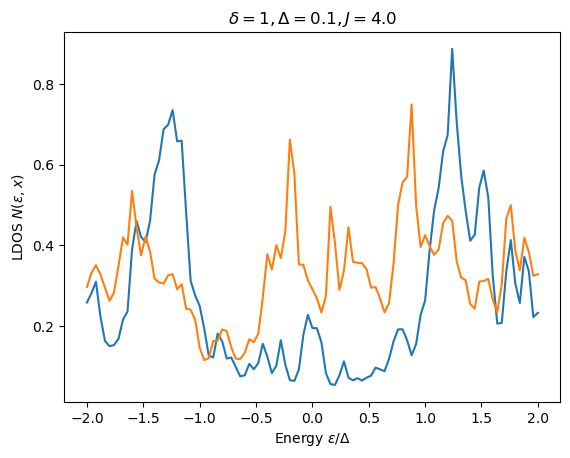

LDOS: 100%|██████████| 51/51 [00:08<00:00,  5.79ε/s]


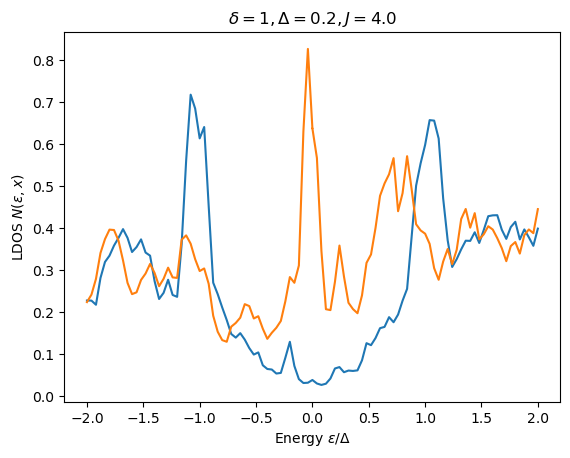

LDOS: 100%|██████████| 51/51 [00:08<00:00,  5.81ε/s]


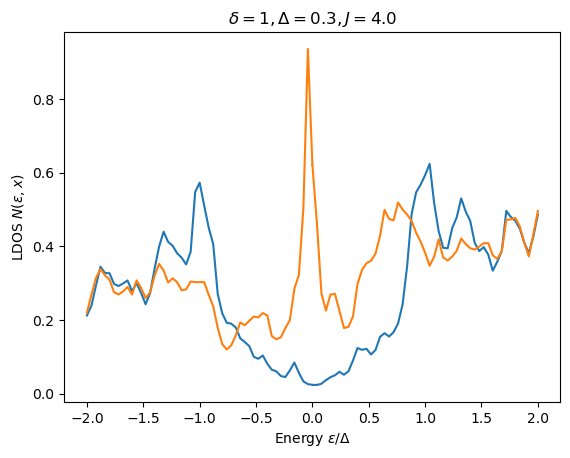

LDOS: 100%|██████████| 51/51 [00:08<00:00,  5.80ε/s]


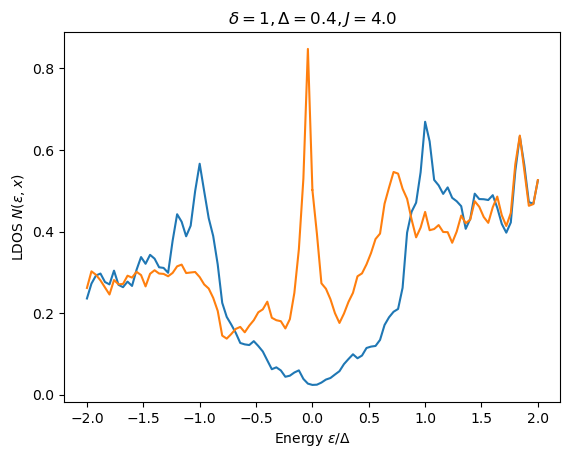

In [7]:
d = d_x
J0 = 4.0

for Δ0 in [0.01, 0.03, 0.05, 0.07, 0.10, 0.20, 0.30, 0.40]:
    plot_ysr(d, 1, Δ0, J0, μ)

These results make it extremely clear that the higher Δ the better results. However Δ = 0.1 and above the gap itself is actually quite clear, despite the 64x64 lattice. That's a nice and round value, so let's try to go for that.

### Constraining J for fixed Δ
Let's now try to see how low J we can get away with and still get interesting results.

LDOS: 100%|██████████| 51/51 [00:10<00:00,  4.87ε/s]


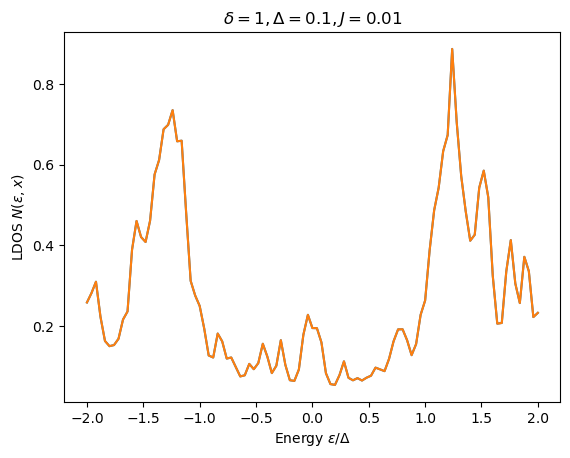

LDOS: 100%|██████████| 51/51 [00:08<00:00,  5.76ε/s]


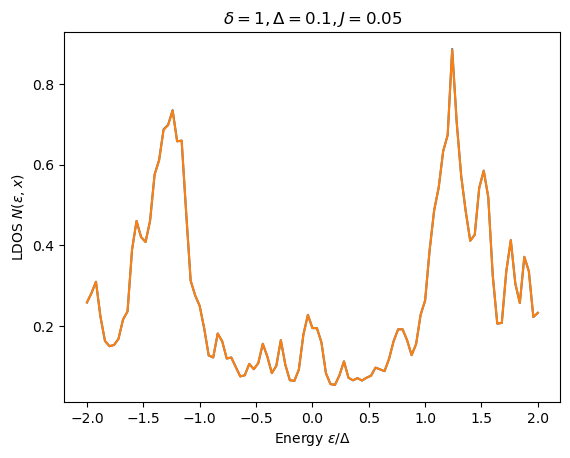

LDOS: 100%|██████████| 51/51 [00:08<00:00,  5.77ε/s]


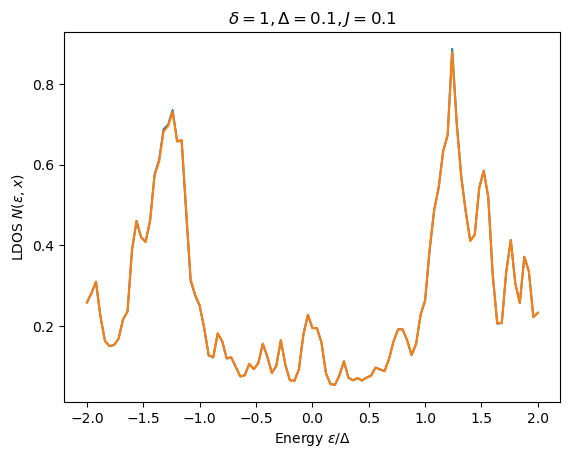

LDOS: 100%|██████████| 51/51 [00:08<00:00,  5.87ε/s]


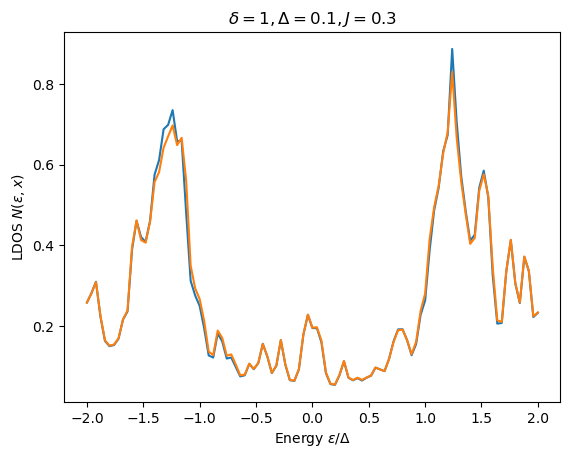

LDOS: 100%|██████████| 51/51 [00:08<00:00,  5.87ε/s]


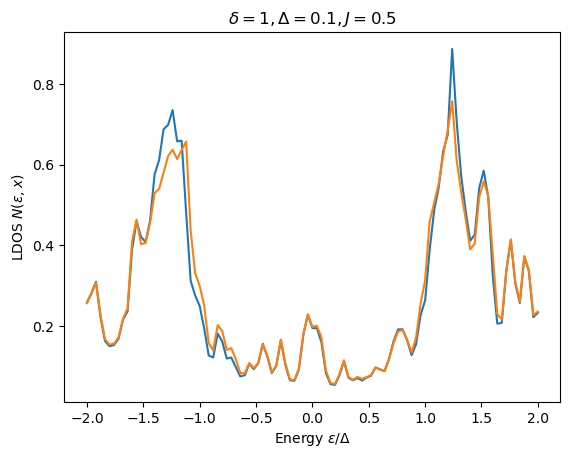

LDOS: 100%|██████████| 51/51 [00:08<00:00,  5.73ε/s]


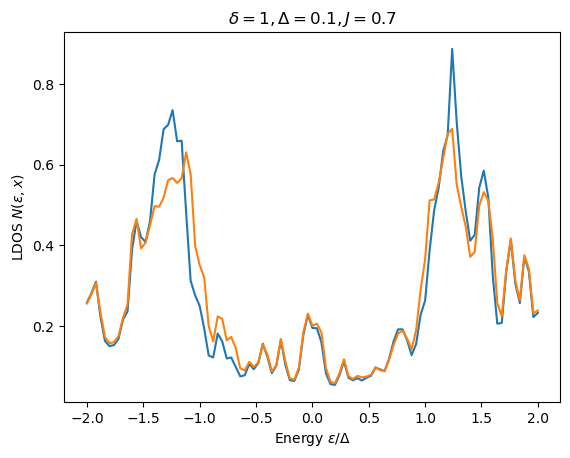

LDOS: 100%|██████████| 51/51 [00:08<00:00,  5.76ε/s]


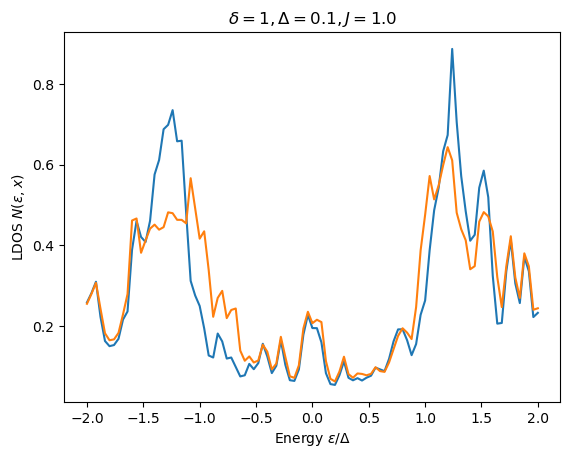

LDOS: 100%|██████████| 51/51 [00:08<00:00,  5.81ε/s]


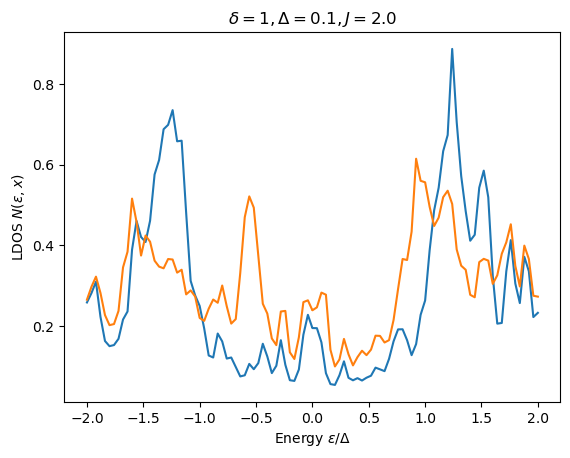

LDOS: 100%|██████████| 51/51 [00:08<00:00,  5.77ε/s]


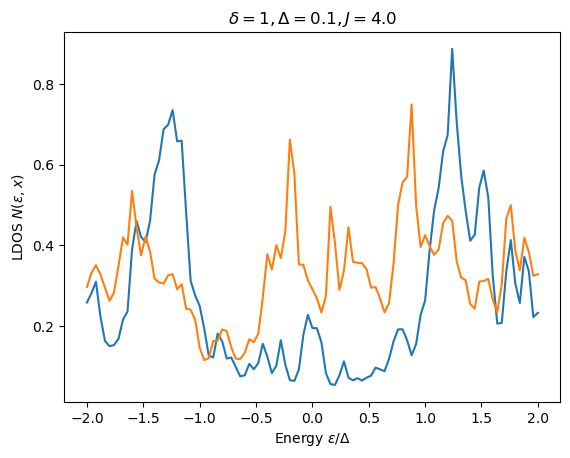

In [8]:
d = d_x
Δ0 = 0.10

for J0 in [0.01, 0.05, 0.10, 0.30, 0.50, 0.70, 1.00, 2.00, 4.00]:
    plot_ysr(d, 1, Δ0, J0, μ)

From this, it appears that $J = 2t$ might be sufficient to see something interesting going on. Let's double-check that also the other $d$-vectors behave reasonably there.

LDOS: 100%|██████████| 51/51 [00:08<00:00,  5.67ε/s]


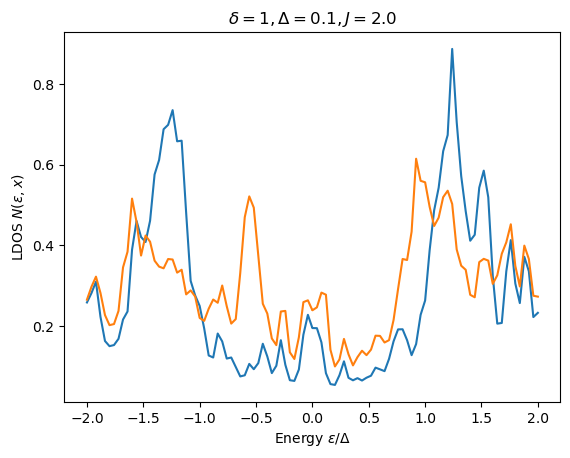

LDOS: 100%|██████████| 51/51 [00:08<00:00,  5.75ε/s]


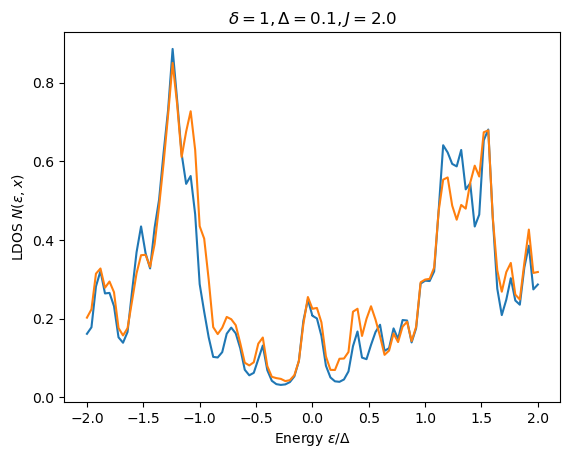

LDOS: 100%|██████████| 51/51 [00:09<00:00,  5.66ε/s]


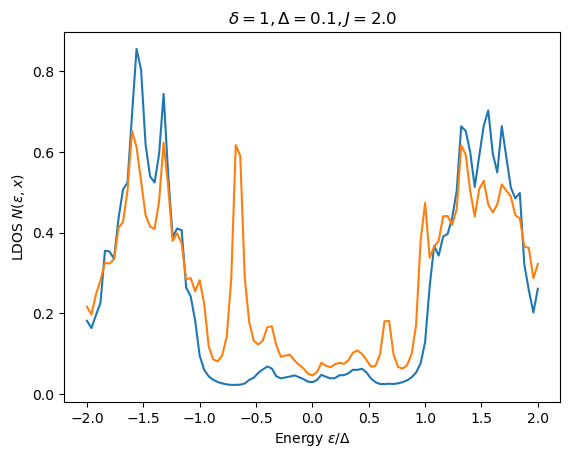

In [9]:
Δ0 = 0.10
J0 = 2.00

for d in [d_x, d_y, d_xy]:
    plot_ysr(d, 1, Δ0, J0, μ)

Conclusion: These results remain quite interesting for these parameters, which are not so extreme compared to what has been reported in the literature.

### Effect of the chemical potential
Interesting to sneak a peak at this.
My previous experience has pretty much been that $μ → 0$ is better for YSR but that $μ ≪ 0$ is better for clear RKKY signatures.

LDOS: 100%|██████████| 51/51 [00:06<00:00,  7.68ε/s]


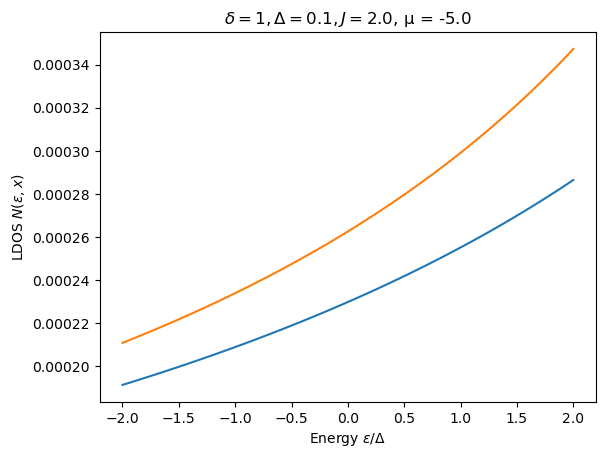

LDOS: 100%|██████████| 51/51 [00:06<00:00,  7.65ε/s]


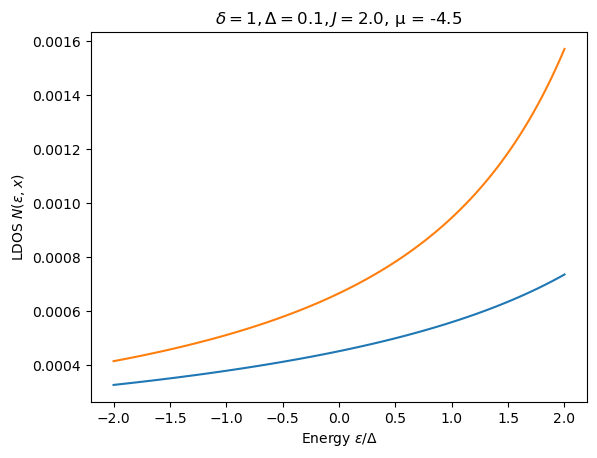

LDOS: 100%|██████████| 51/51 [00:06<00:00,  7.61ε/s]


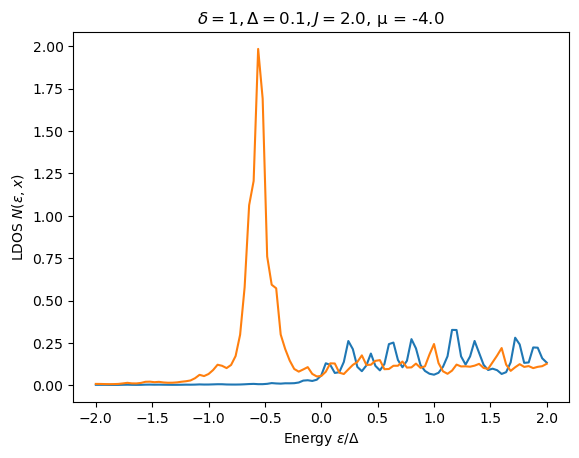

LDOS: 100%|██████████| 51/51 [00:06<00:00,  7.46ε/s]


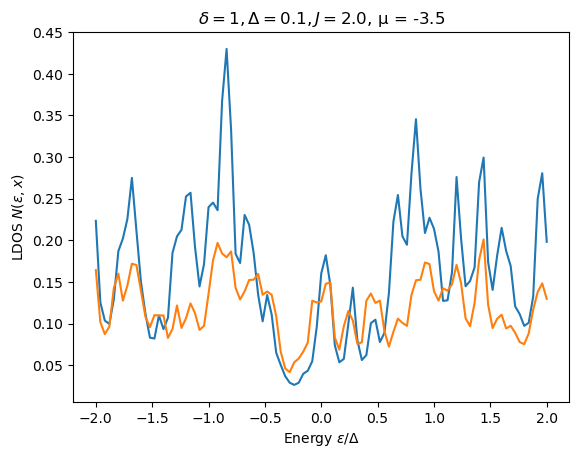

LDOS: 100%|██████████| 51/51 [00:07<00:00,  7.18ε/s]


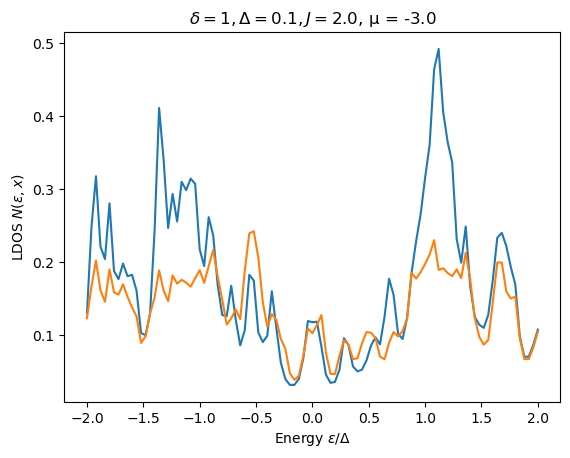

LDOS: 100%|██████████| 51/51 [00:07<00:00,  6.67ε/s]


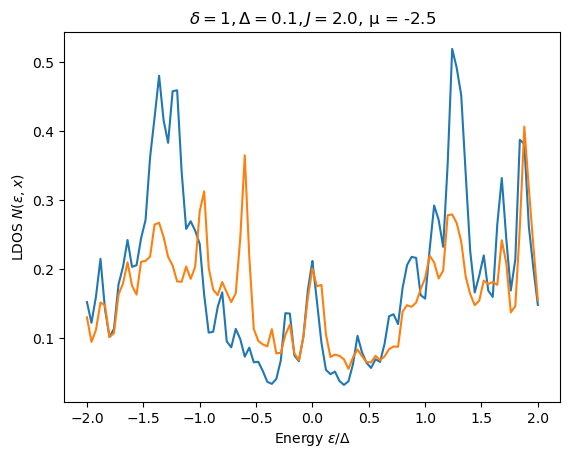

LDOS: 100%|██████████| 51/51 [00:08<00:00,  6.34ε/s]


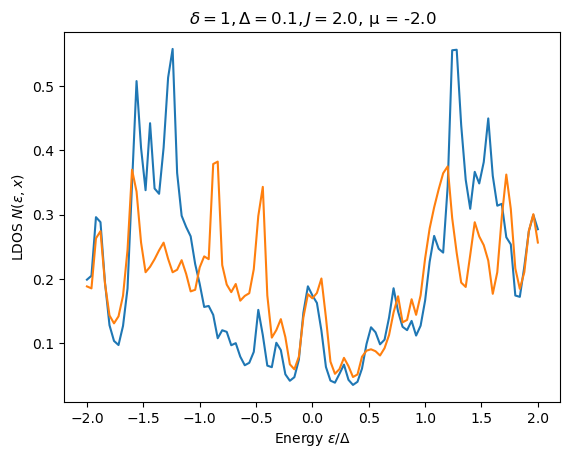

LDOS: 100%|██████████| 51/51 [00:08<00:00,  6.19ε/s]


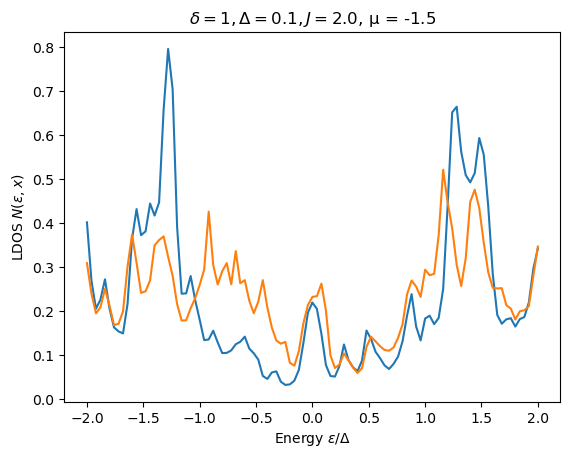

LDOS: 100%|██████████| 51/51 [00:08<00:00,  5.80ε/s]


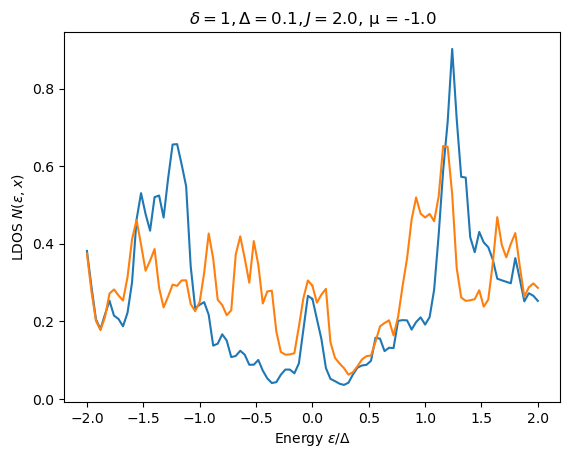

LDOS: 100%|██████████| 51/51 [00:09<00:00,  5.49ε/s]


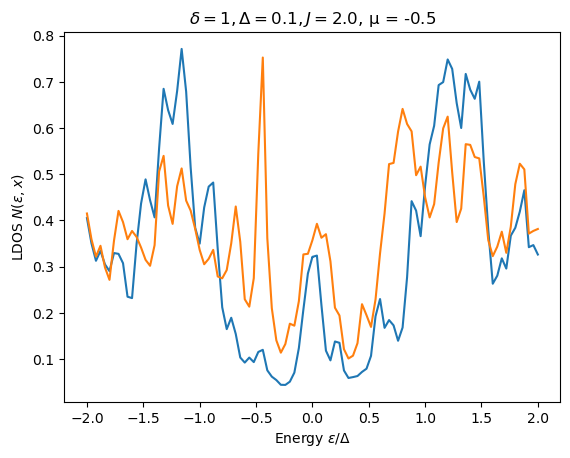

LDOS: 100%|██████████| 51/51 [00:09<00:00,  5.51ε/s]


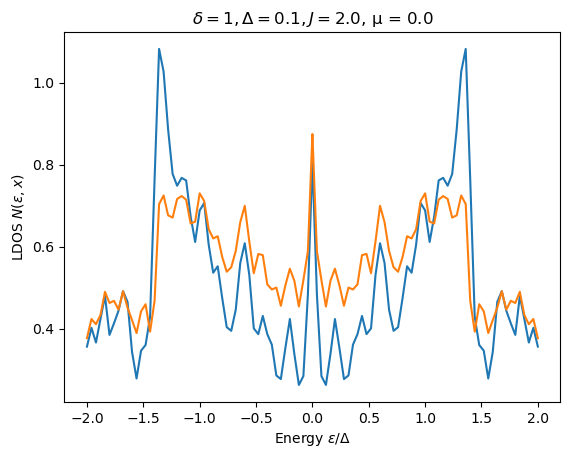

LDOS: 100%|██████████| 51/51 [00:09<00:00,  5.56ε/s]


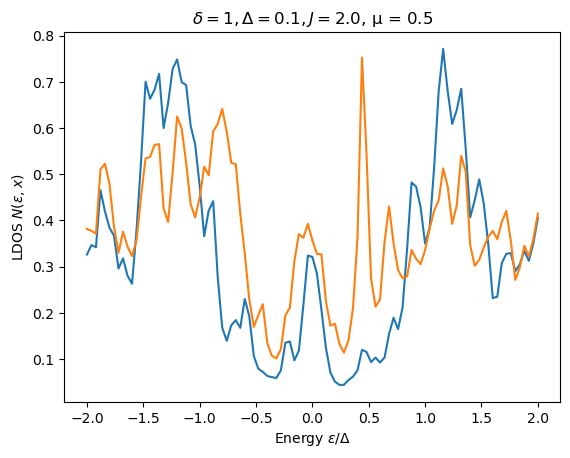

LDOS: 100%|██████████| 51/51 [00:08<00:00,  5.87ε/s]


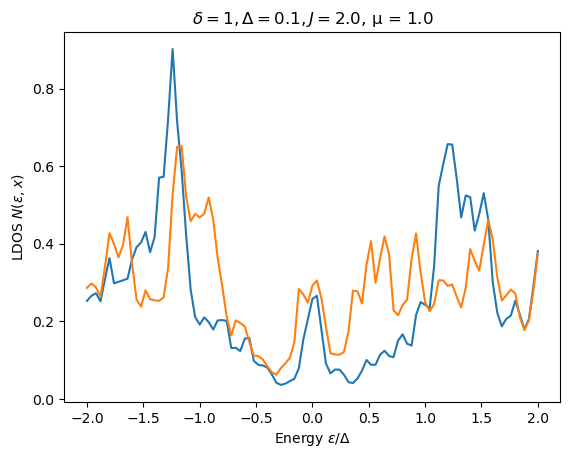

LDOS: 100%|██████████| 51/51 [00:09<00:00,  5.65ε/s]


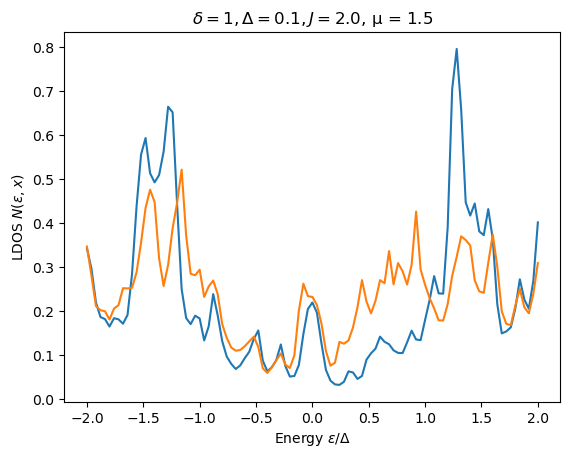

LDOS: 100%|██████████| 51/51 [00:08<00:00,  6.22ε/s]


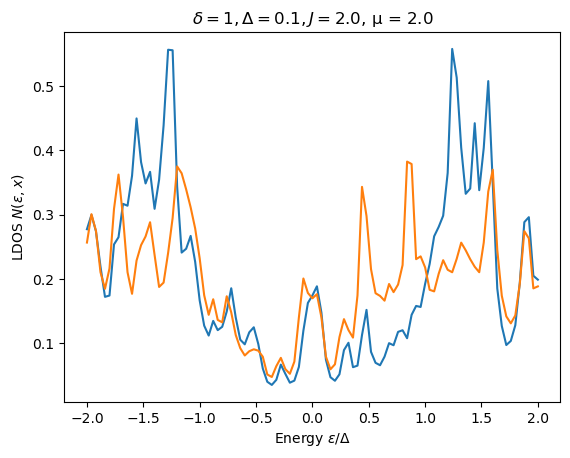

LDOS: 100%|██████████| 51/51 [00:07<00:00,  6.59ε/s]


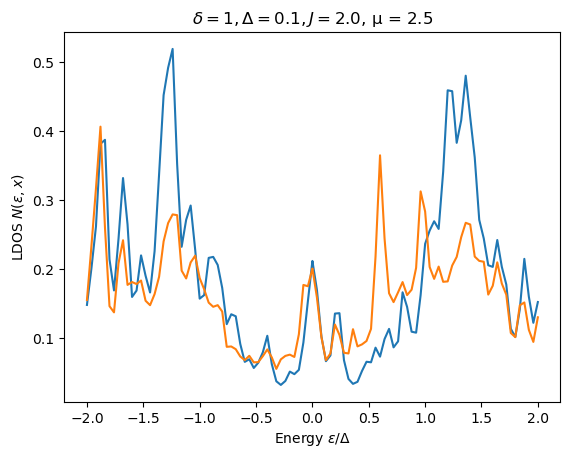

LDOS: 100%|██████████| 51/51 [00:07<00:00,  7.09ε/s]


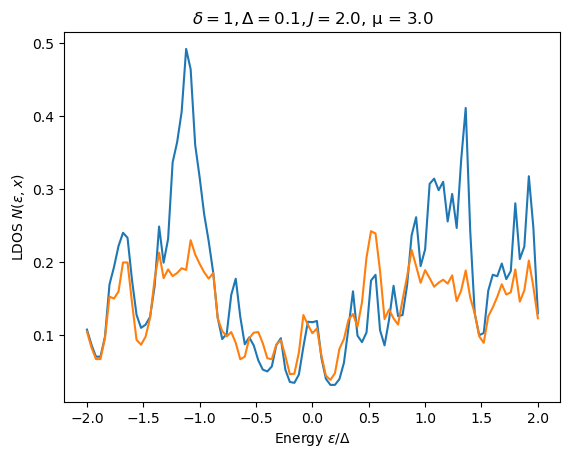

LDOS: 100%|██████████| 51/51 [00:06<00:00,  7.45ε/s]


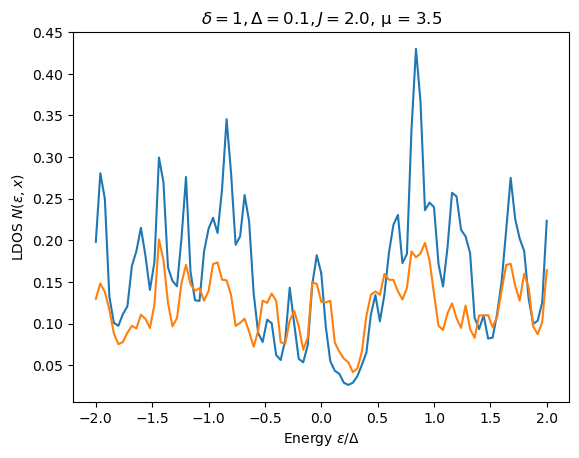

LDOS: 100%|██████████| 51/51 [00:06<00:00,  7.66ε/s]


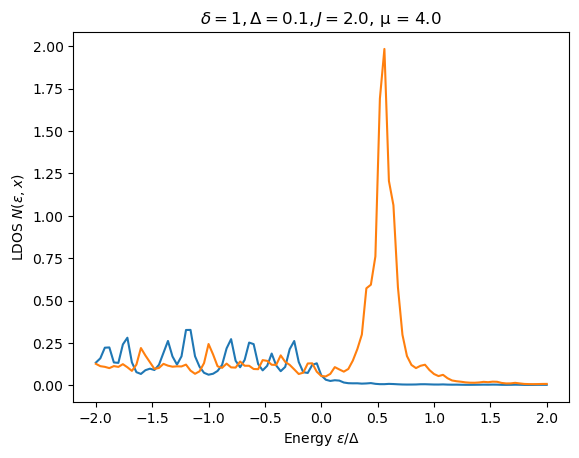

LDOS: 100%|██████████| 51/51 [00:06<00:00,  7.61ε/s]


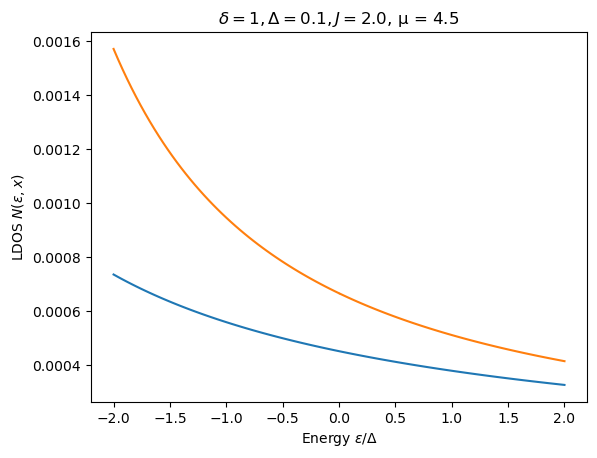

LDOS: 100%|██████████| 51/51 [00:06<00:00,  7.60ε/s]


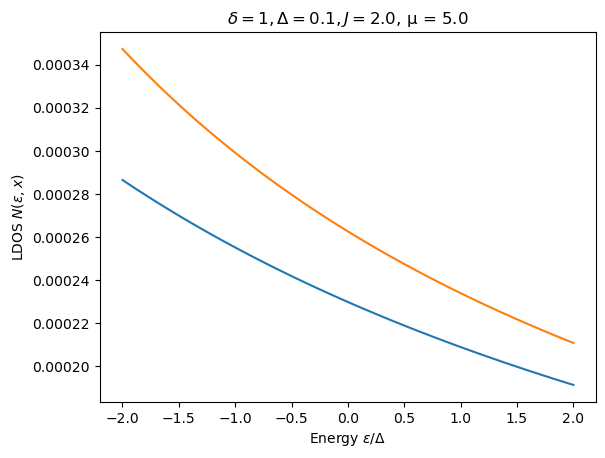

In [13]:
d = d_x
Δ0 = 0.10
J0 = 2.00

for µ in np.linspace(-5, +5, 21):
    plot_ysr(d, 1, Δ0, J0, μ)

Conclusion: We should probably stay within $|\mu| < 2.5t$ to get reasonable results, since that's when we can clearly see a gap and some bound states. Perhaps $\mu = -1.5t$ for example might be reasonable.

### Effect of the distance

For a final benchmark, let's now have a look at different positions, using $p_x$ as the benchmark again. We want to know how localized the bound state is here. Interestingly, the YSR states become more long-ranged for these cases, so it might actually be a good idea to select as low values for $µ$ as provides a visible gap.

LDOS: 100%|██████████| 51/51 [00:06<00:00,  7.29ε/s]


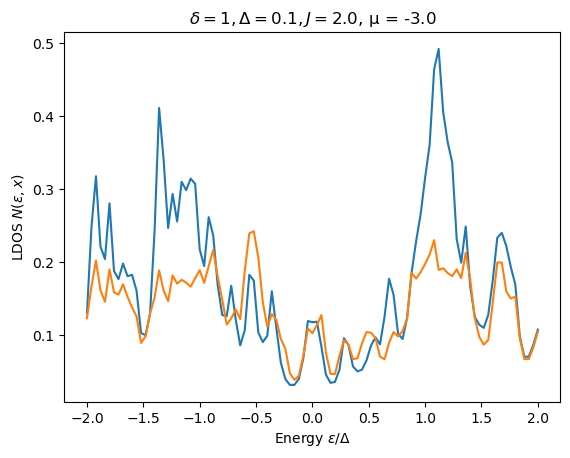

LDOS: 100%|██████████| 51/51 [00:07<00:00,  7.17ε/s]


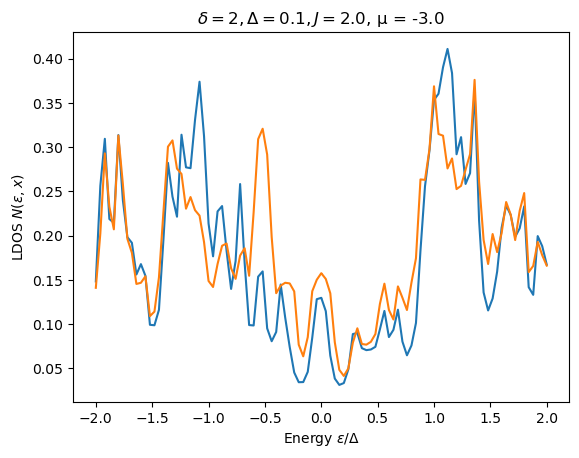

LDOS: 100%|██████████| 51/51 [00:07<00:00,  7.13ε/s]


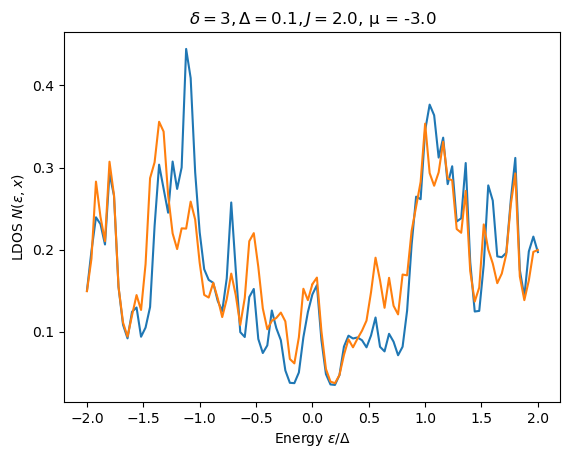

LDOS: 100%|██████████| 51/51 [00:07<00:00,  7.00ε/s]


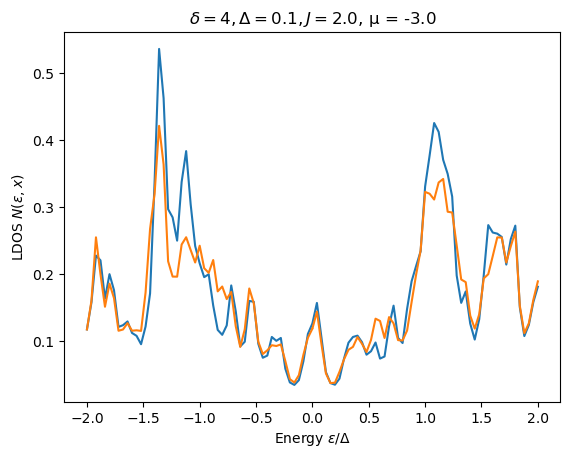

LDOS: 100%|██████████| 51/51 [00:07<00:00,  7.10ε/s]


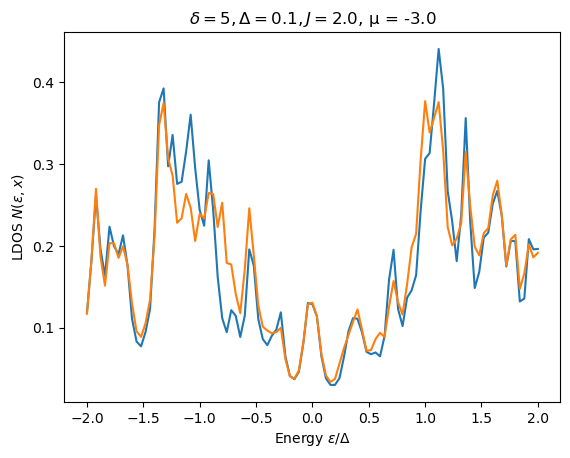

LDOS: 100%|██████████| 51/51 [00:07<00:00,  6.60ε/s]


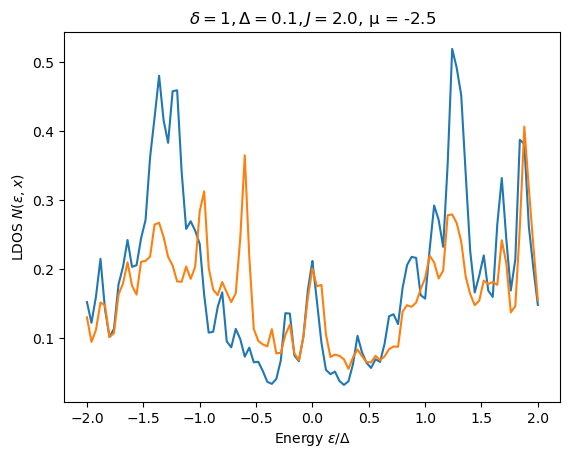

LDOS: 100%|██████████| 51/51 [00:07<00:00,  6.65ε/s]


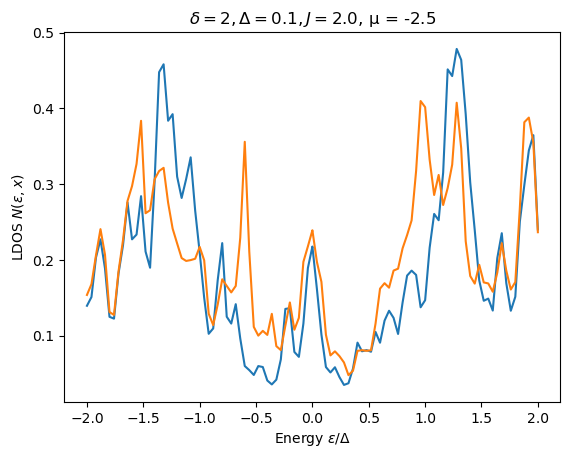

LDOS: 100%|██████████| 51/51 [00:07<00:00,  6.66ε/s]


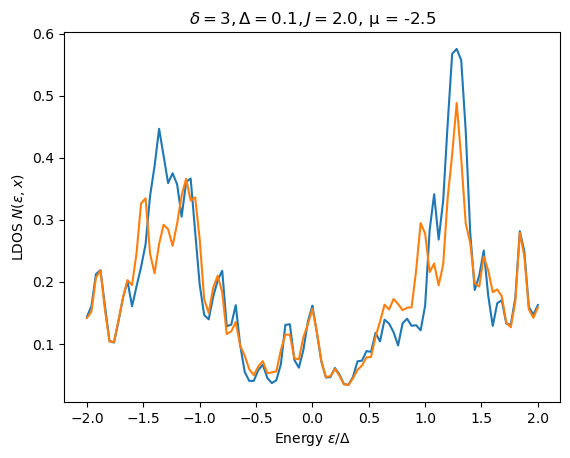

LDOS: 100%|██████████| 51/51 [00:07<00:00,  6.71ε/s]


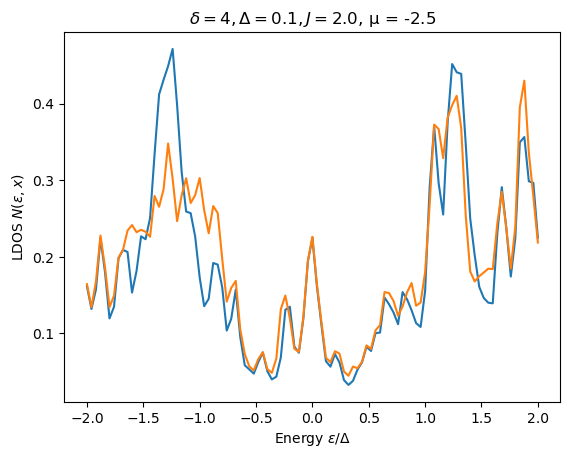

LDOS: 100%|██████████| 51/51 [00:07<00:00,  6.71ε/s]


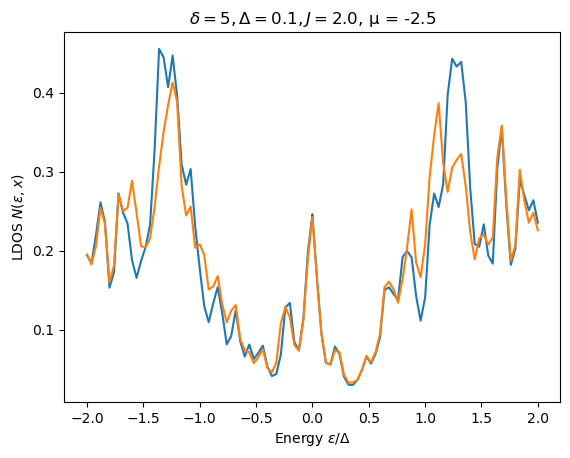

LDOS: 100%|██████████| 51/51 [00:08<00:00,  6.12ε/s]


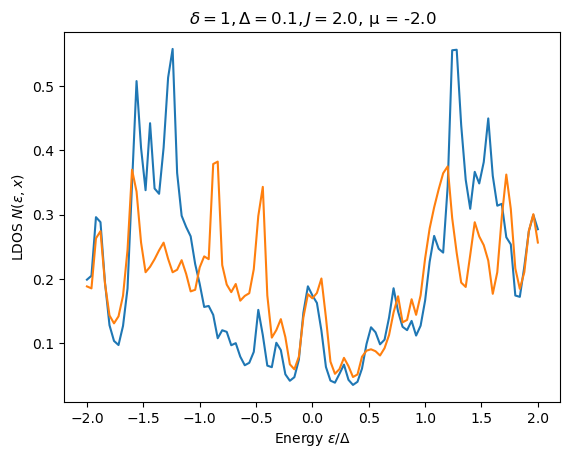

LDOS: 100%|██████████| 51/51 [00:08<00:00,  6.22ε/s]


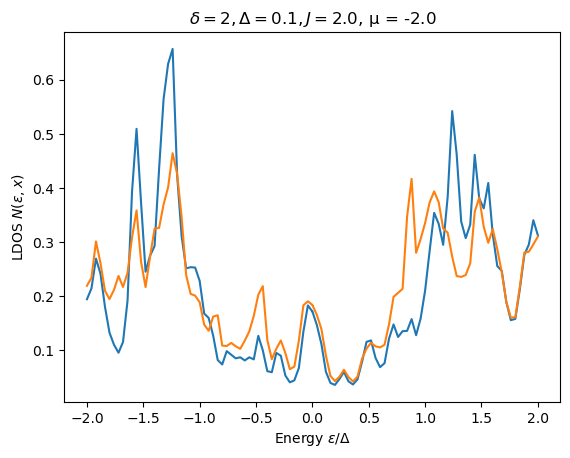

LDOS: 100%|██████████| 51/51 [00:08<00:00,  6.20ε/s]


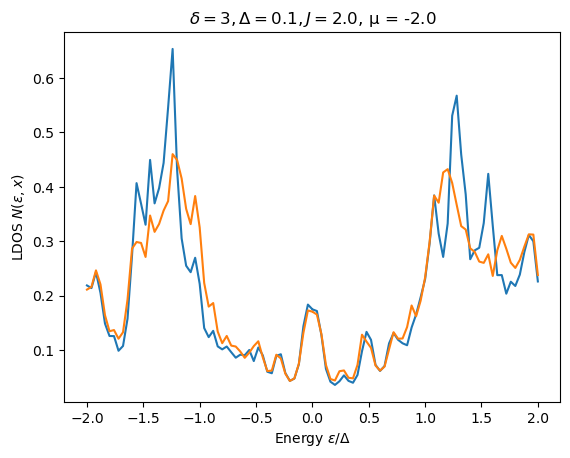

LDOS: 100%|██████████| 51/51 [00:08<00:00,  6.21ε/s]


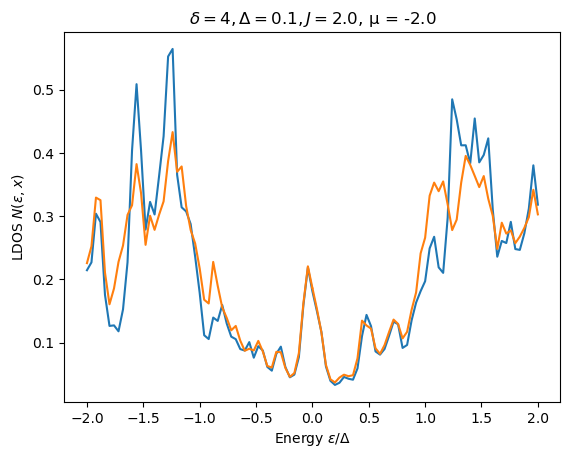

LDOS: 100%|██████████| 51/51 [00:08<00:00,  6.28ε/s]


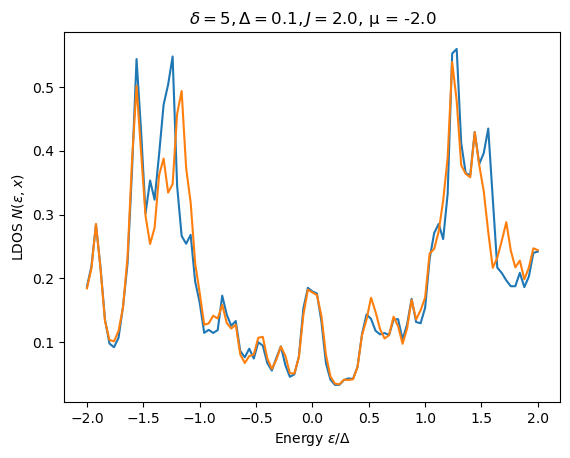

LDOS: 100%|██████████| 51/51 [00:08<00:00,  6.19ε/s]


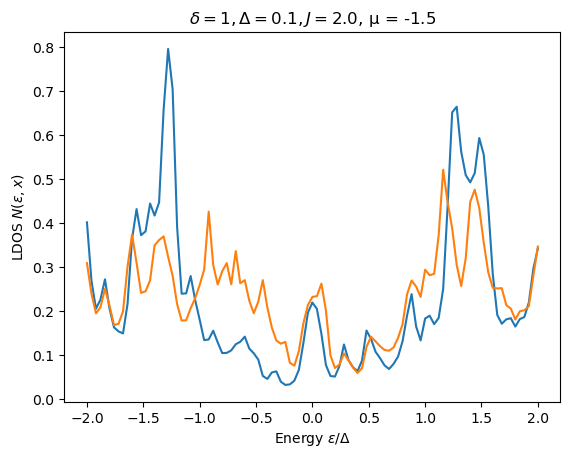

LDOS: 100%|██████████| 51/51 [00:08<00:00,  6.15ε/s]


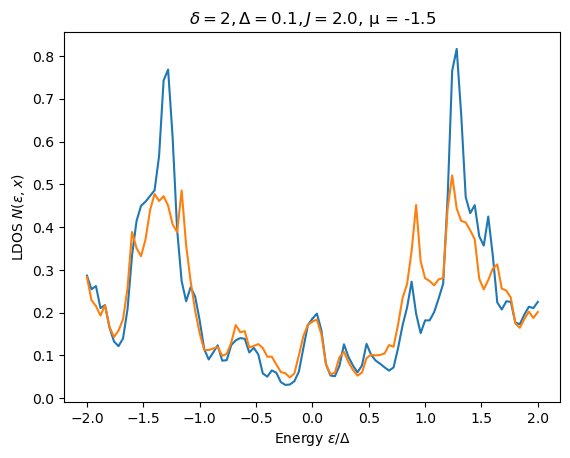

LDOS: 100%|██████████| 51/51 [00:08<00:00,  6.03ε/s]


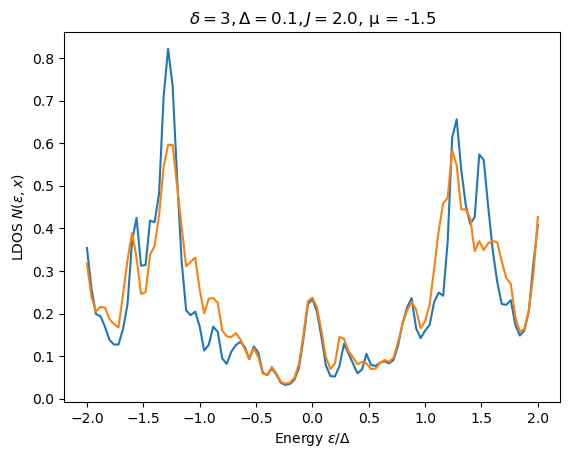

LDOS: 100%|██████████| 51/51 [00:08<00:00,  6.02ε/s]


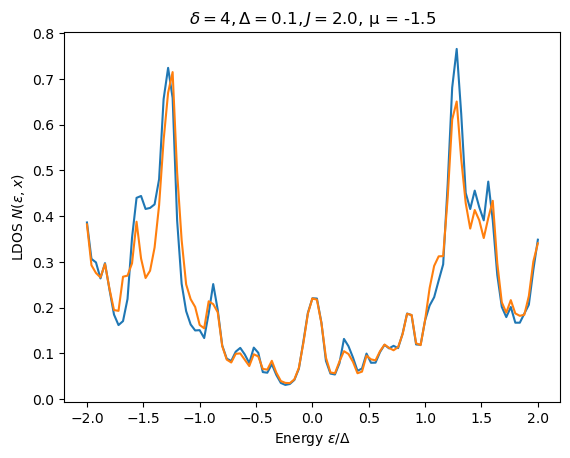

LDOS: 100%|██████████| 51/51 [00:08<00:00,  6.21ε/s]


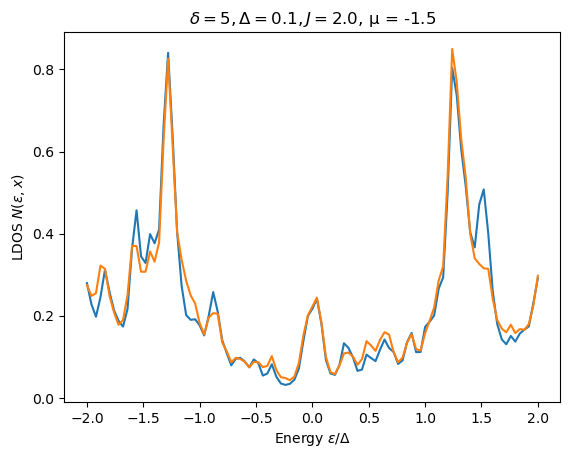

LDOS: 100%|██████████| 51/51 [00:09<00:00,  5.47ε/s]


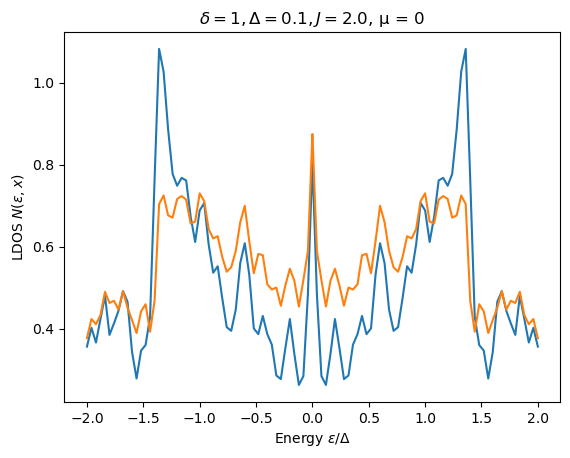

LDOS: 100%|██████████| 51/51 [00:09<00:00,  5.57ε/s]


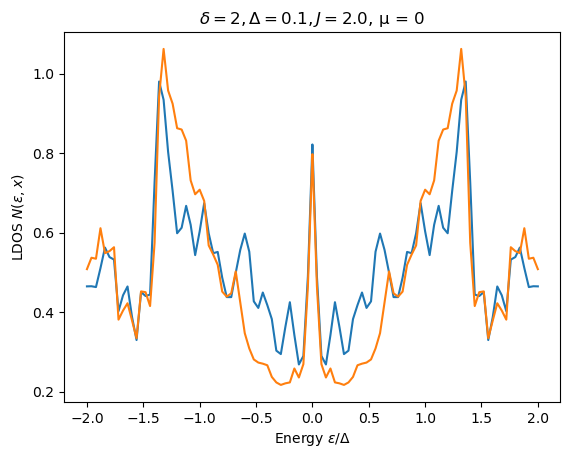

LDOS: 100%|██████████| 51/51 [00:09<00:00,  5.51ε/s]


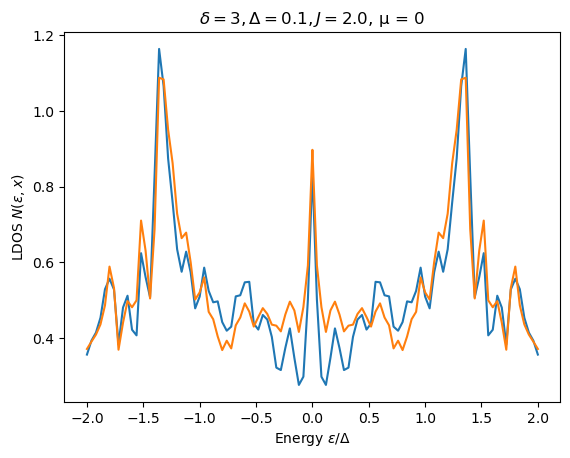

LDOS: 100%|██████████| 51/51 [00:09<00:00,  5.53ε/s]


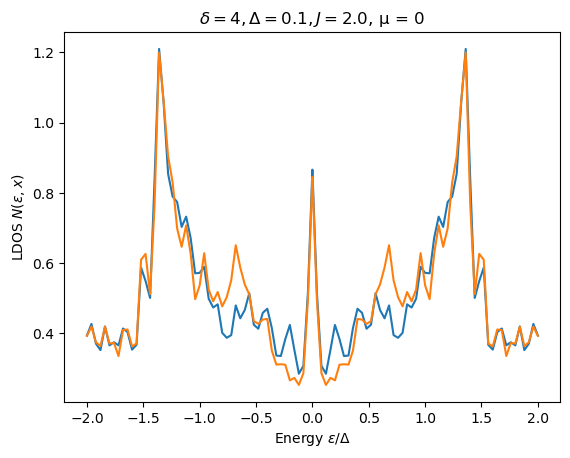

LDOS: 100%|██████████| 51/51 [00:09<00:00,  5.58ε/s]


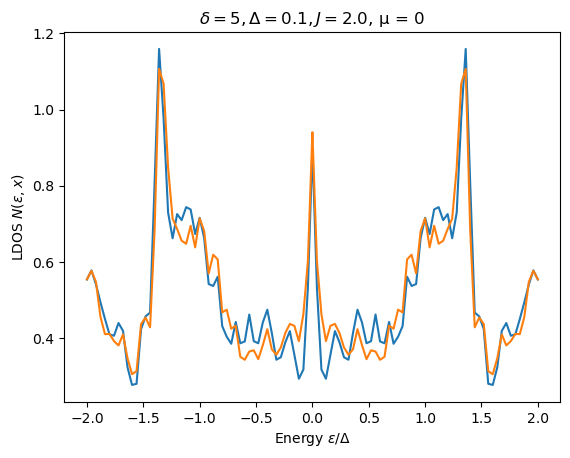

In [17]:
d = d_x
µ = -1.5
Δ0 = 0.10
J0 = 2.00

for µ in [-3.0, -2.5, -2.0, -1.5, 0]:
    for δ in [1,2,3,4,5]:
        plot_ysr(d, δ, Δ0, J0, μ)

### New round of $J$
From the above, we basically learned that longer-ranged (but not long-ranged) YSR states can be found when we decrease $\mu$ a bit. This makes it worthwhile to also check whether we can do better with higher $J$ and perhaps $\Delta$.

LDOS: 100%|██████████| 51/51 [00:07<00:00,  7.21ε/s]


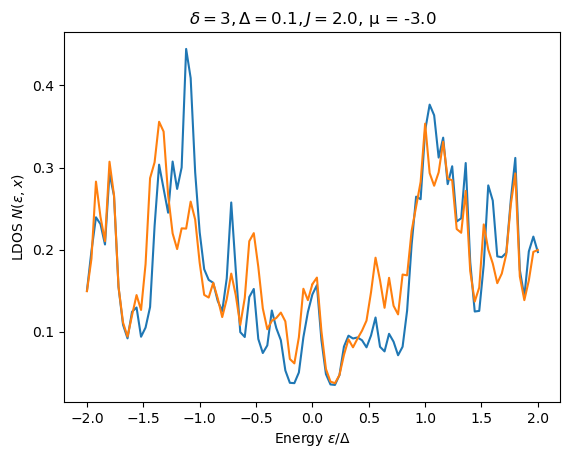

LDOS: 100%|██████████| 51/51 [00:07<00:00,  6.68ε/s]


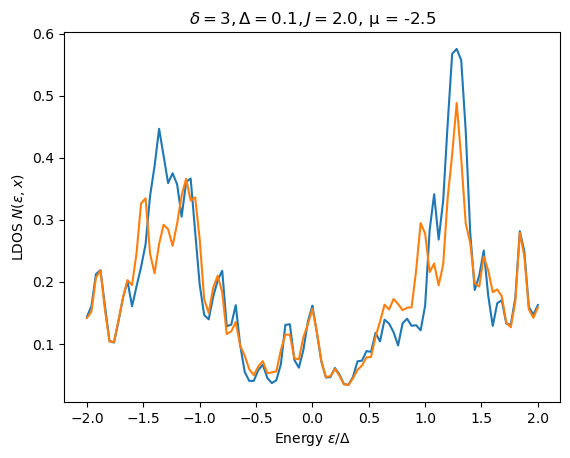

LDOS: 100%|██████████| 51/51 [00:07<00:00,  7.13ε/s]


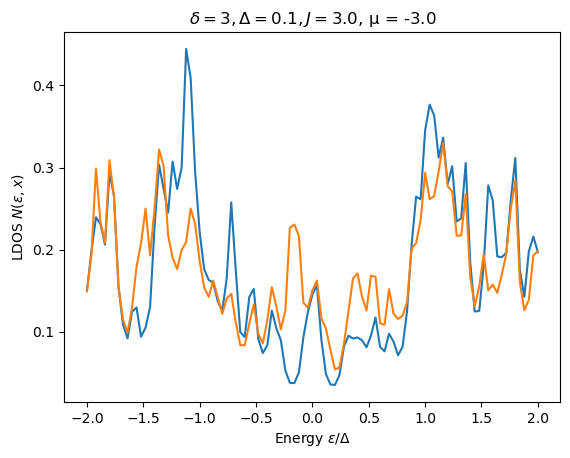

LDOS: 100%|██████████| 51/51 [00:07<00:00,  6.66ε/s]


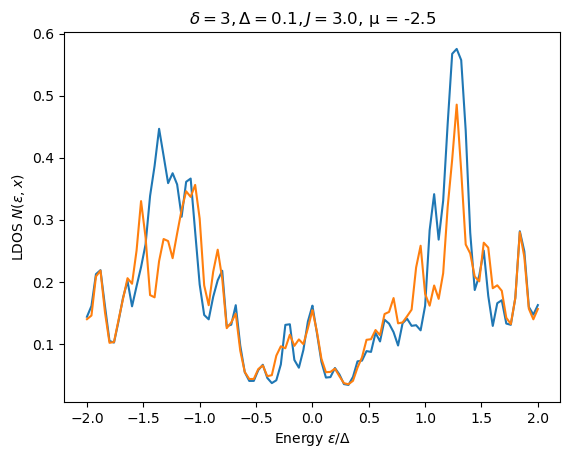

LDOS: 100%|██████████| 51/51 [00:07<00:00,  7.11ε/s]


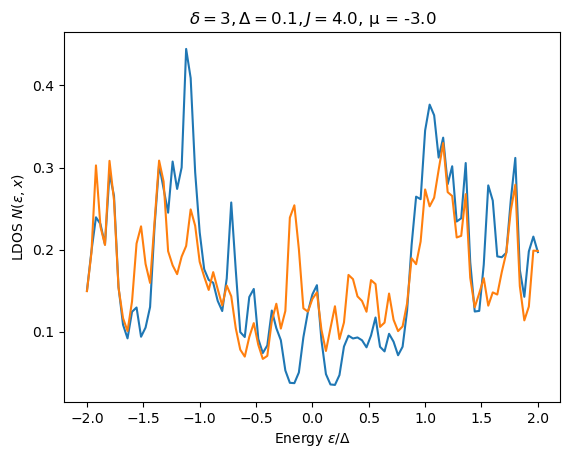

LDOS: 100%|██████████| 51/51 [00:07<00:00,  6.58ε/s]


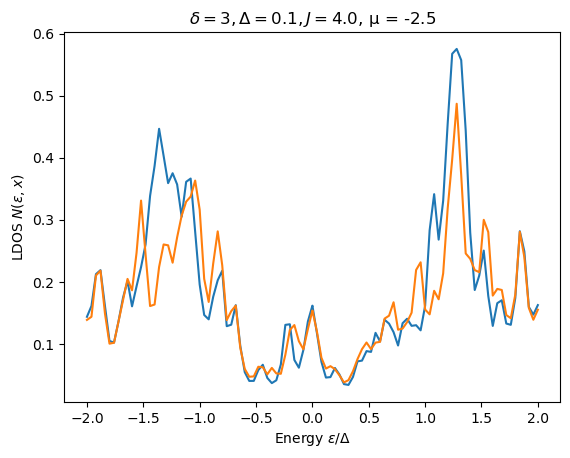

LDOS: 100%|██████████| 51/51 [00:07<00:00,  6.93ε/s]


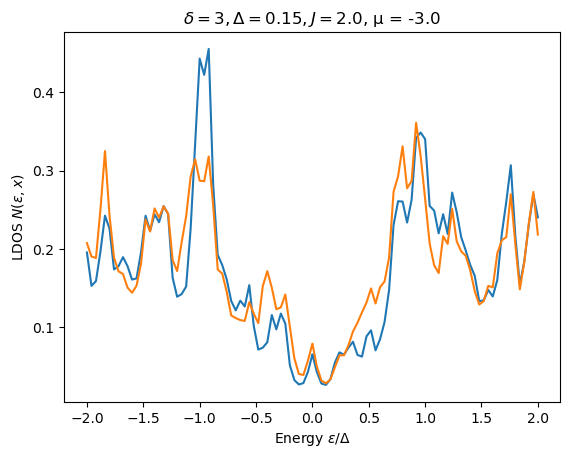

LDOS: 100%|██████████| 51/51 [00:07<00:00,  6.59ε/s]


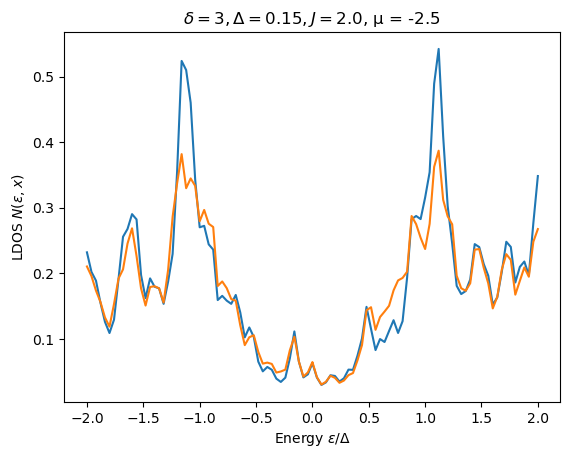

LDOS: 100%|██████████| 51/51 [00:07<00:00,  7.15ε/s]


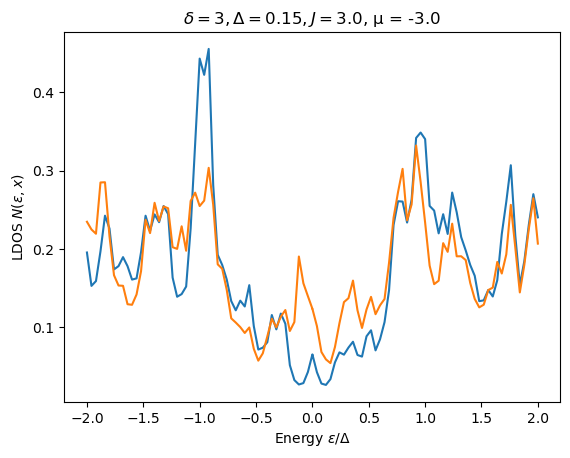

LDOS: 100%|██████████| 51/51 [00:07<00:00,  6.47ε/s]


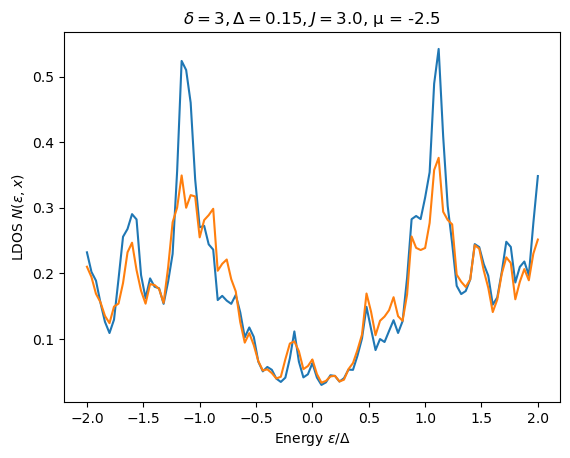

LDOS: 100%|██████████| 51/51 [00:07<00:00,  6.95ε/s]


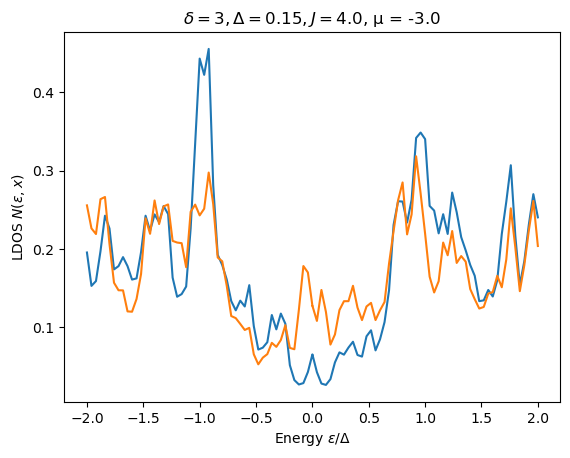

LDOS: 100%|██████████| 51/51 [00:07<00:00,  6.75ε/s]


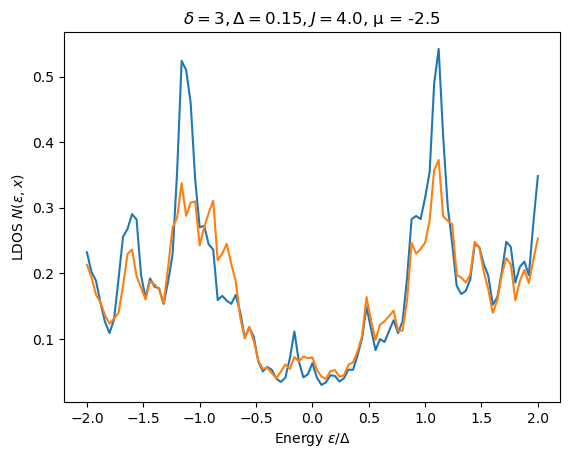

LDOS: 100%|██████████| 51/51 [00:07<00:00,  7.18ε/s]


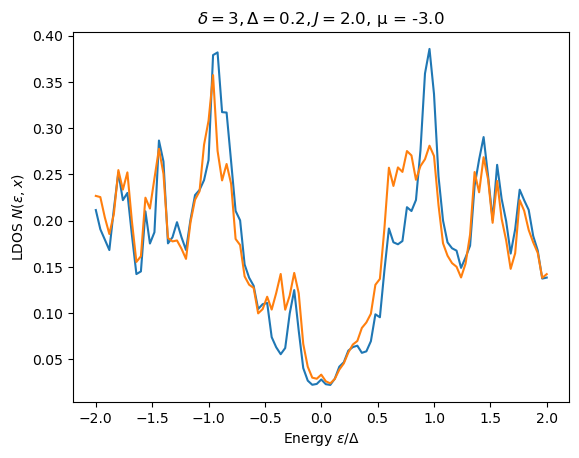

LDOS: 100%|██████████| 51/51 [00:07<00:00,  6.73ε/s]


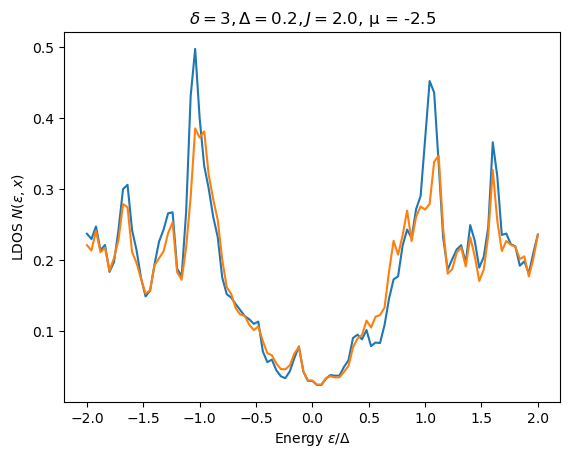

LDOS: 100%|██████████| 51/51 [00:07<00:00,  7.23ε/s]


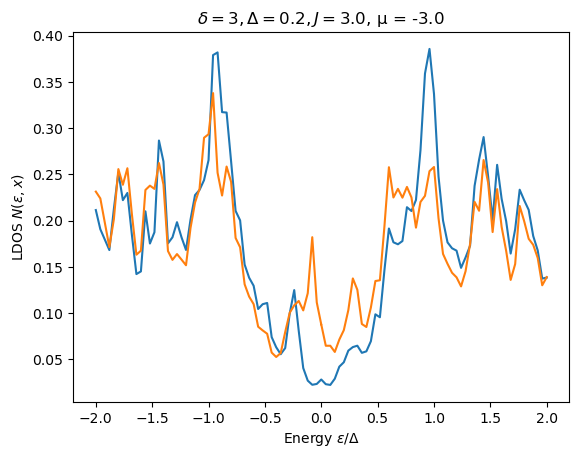

LDOS: 100%|██████████| 51/51 [00:07<00:00,  6.69ε/s]


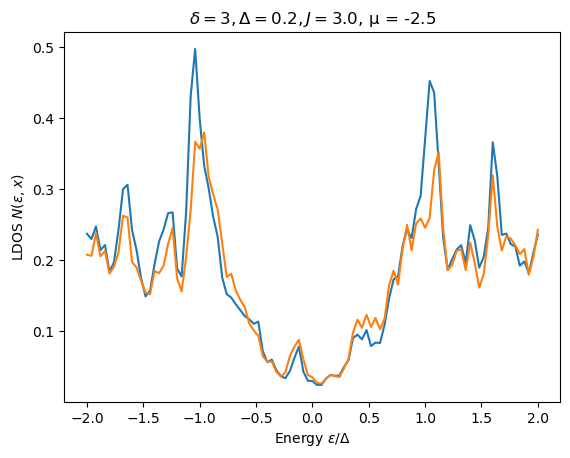

LDOS: 100%|██████████| 51/51 [00:07<00:00,  7.19ε/s]


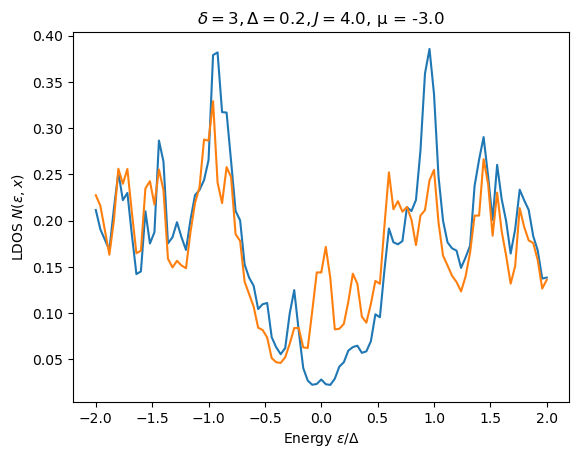

LDOS: 100%|██████████| 51/51 [00:07<00:00,  6.65ε/s]


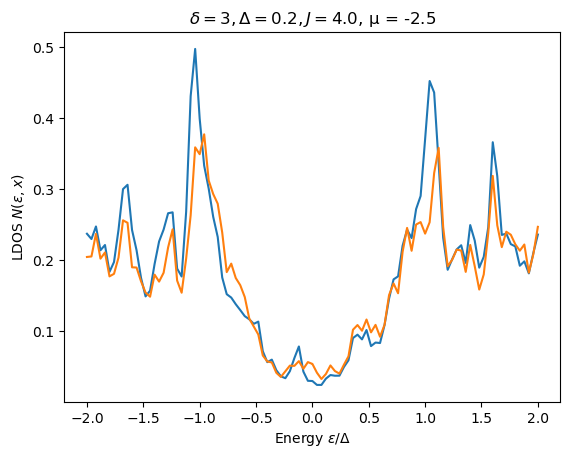

LDOS: 100%|██████████| 51/51 [00:07<00:00,  7.01ε/s]


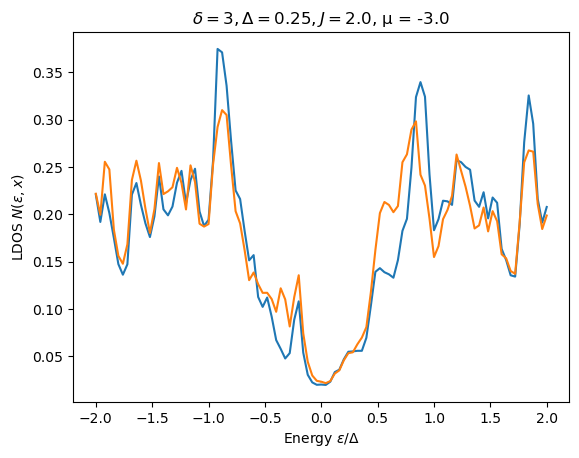

LDOS: 100%|██████████| 51/51 [00:07<00:00,  6.63ε/s]


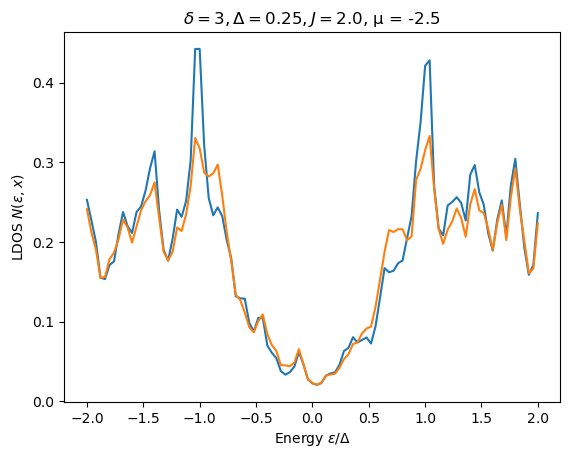

LDOS: 100%|██████████| 51/51 [00:07<00:00,  7.20ε/s]


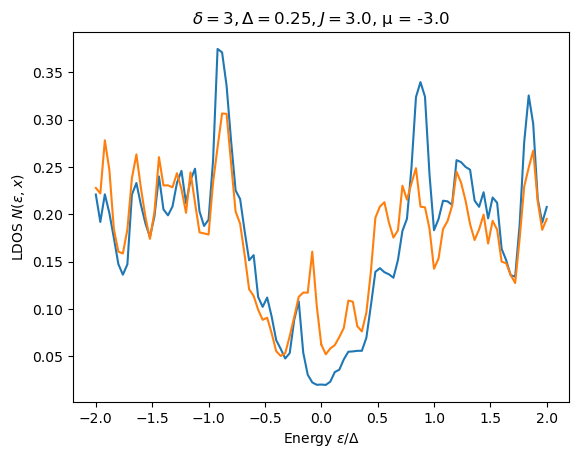

LDOS: 100%|██████████| 51/51 [00:07<00:00,  6.75ε/s]


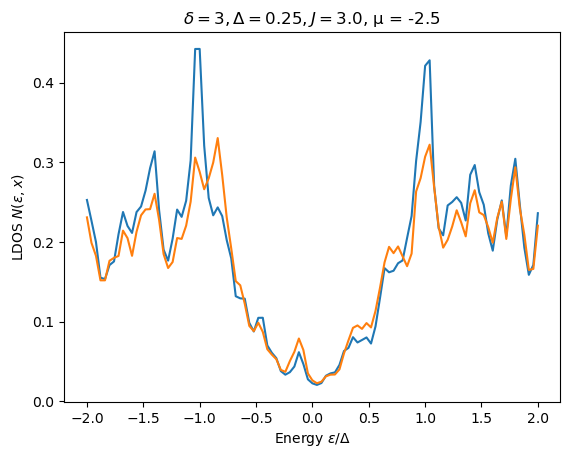

LDOS: 100%|██████████| 51/51 [00:07<00:00,  7.08ε/s]


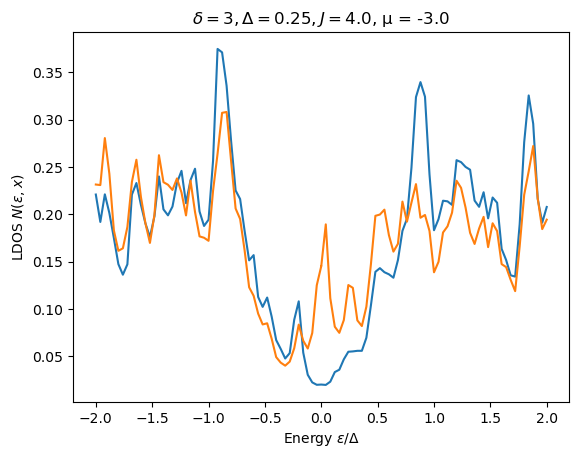

LDOS: 100%|██████████| 51/51 [00:07<00:00,  6.66ε/s]


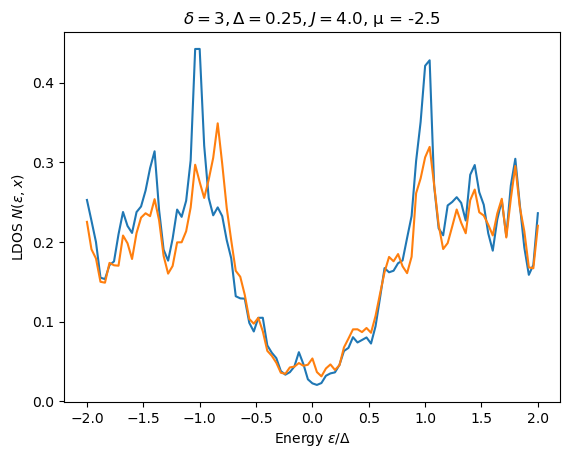

LDOS: 100%|██████████| 51/51 [00:07<00:00,  7.17ε/s]


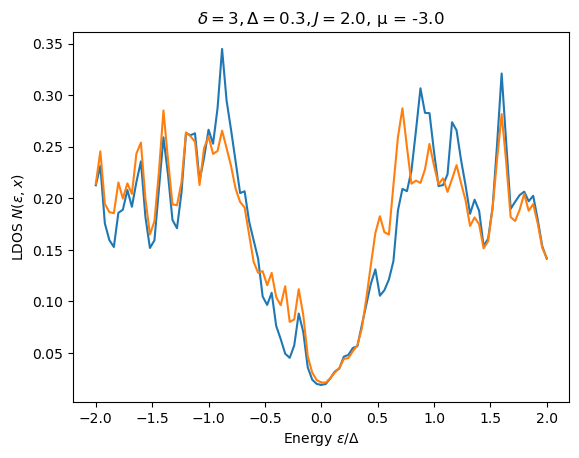

LDOS: 100%|██████████| 51/51 [00:07<00:00,  6.76ε/s]


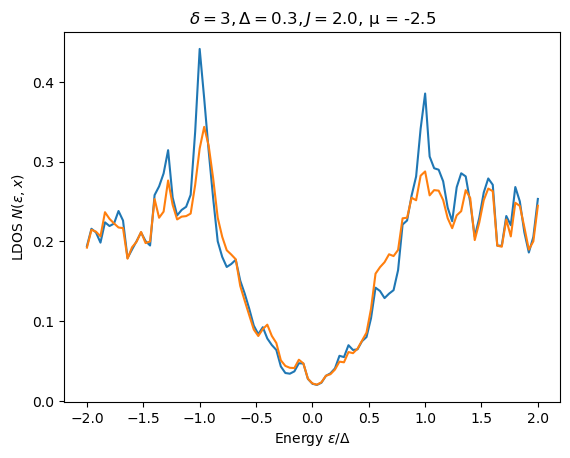

LDOS: 100%|██████████| 51/51 [00:07<00:00,  7.14ε/s]


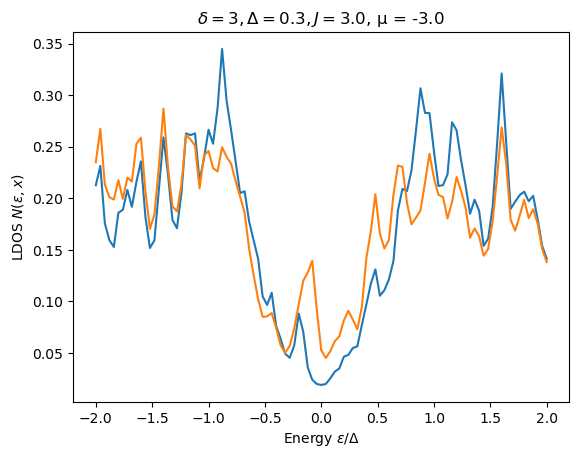

LDOS: 100%|██████████| 51/51 [00:07<00:00,  6.65ε/s]


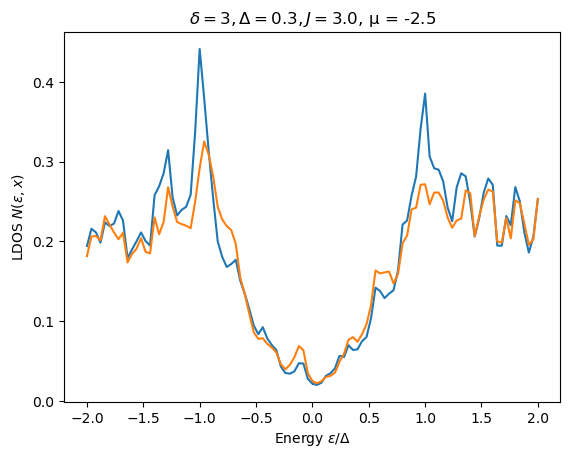

LDOS: 100%|██████████| 51/51 [00:07<00:00,  7.06ε/s]


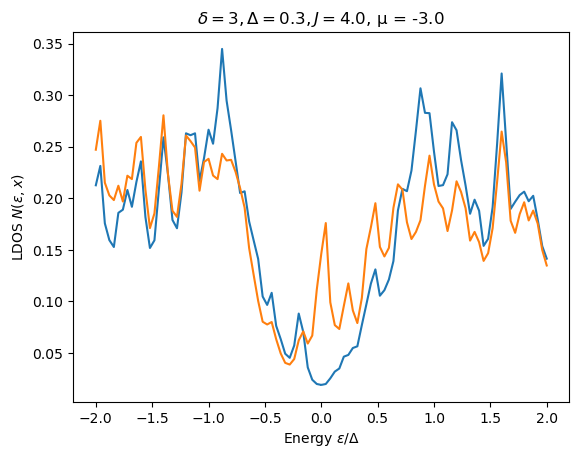

LDOS: 100%|██████████| 51/51 [00:07<00:00,  6.61ε/s]


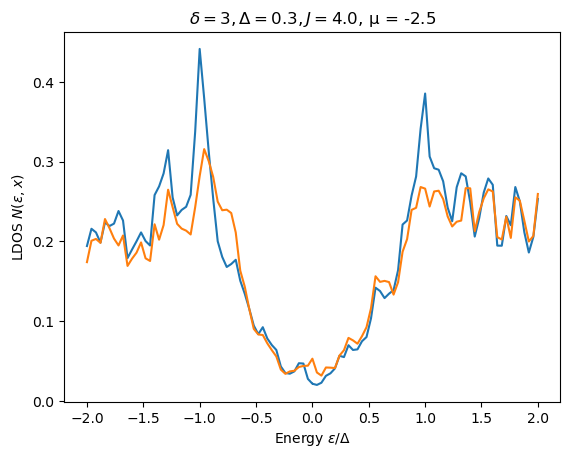

In [20]:
d = d_x
δ = 3

for Δ0 in [0.10, 0.15, 0.20, 0.25, 0.30]:
    for J0 in [2.00, 3.00, 4.00]:
        for μ in [-3.0, -2.5]:
            plot_ysr(d, δ, Δ0, J0, μ)

In general, it seems like going to $\mu = -3t$ gives a significantly better range of the YSR state, but we then need to increase to $\Delta = 0.2t$ in order to still clearly see the gap structure. We should also increase to $J = 3t$ in that case.

LDOS: 100%|██████████| 51/51 [00:07<00:00,  7.26ε/s]


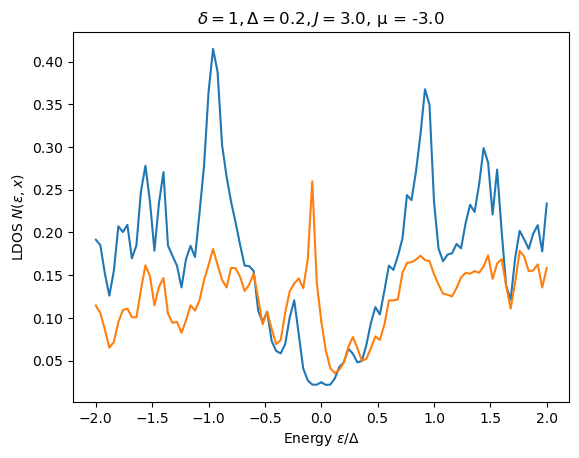

LDOS: 100%|██████████| 51/51 [00:07<00:00,  7.19ε/s]


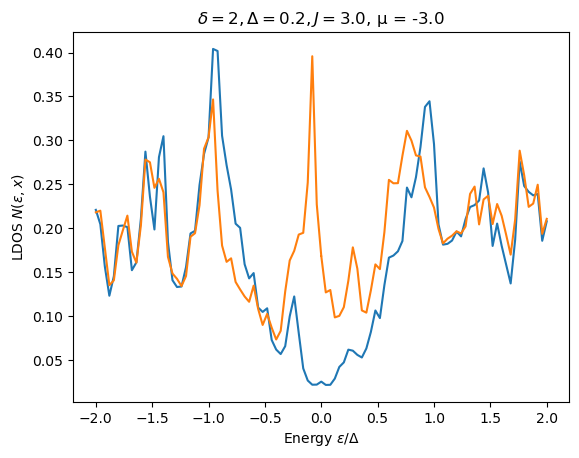

LDOS: 100%|██████████| 51/51 [00:07<00:00,  7.12ε/s]


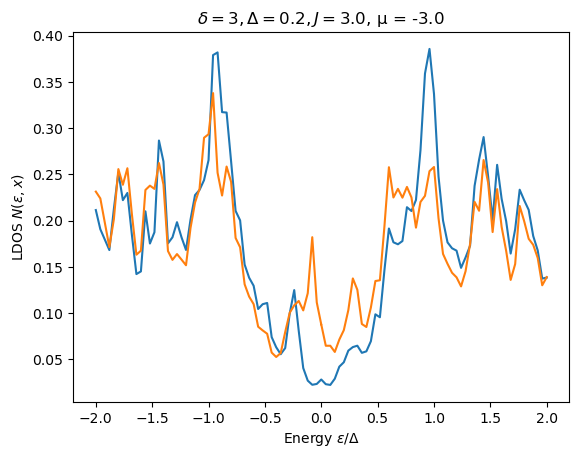

LDOS: 100%|██████████| 51/51 [00:07<00:00,  7.16ε/s]


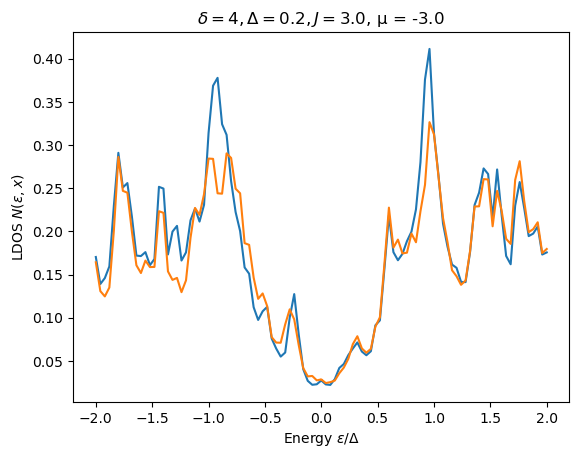

LDOS: 100%|██████████| 51/51 [00:07<00:00,  7.10ε/s]


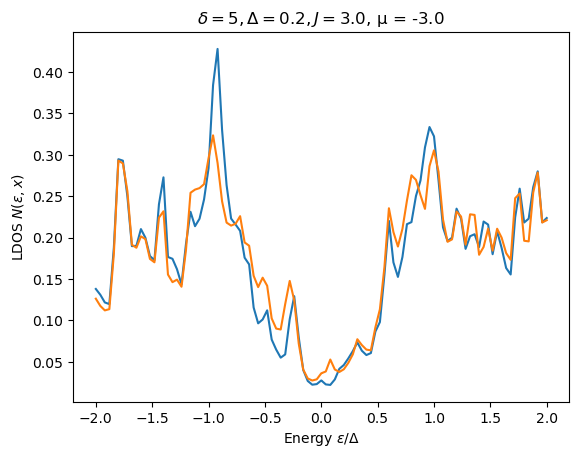

LDOS: 100%|██████████| 51/51 [00:07<00:00,  7.03ε/s]


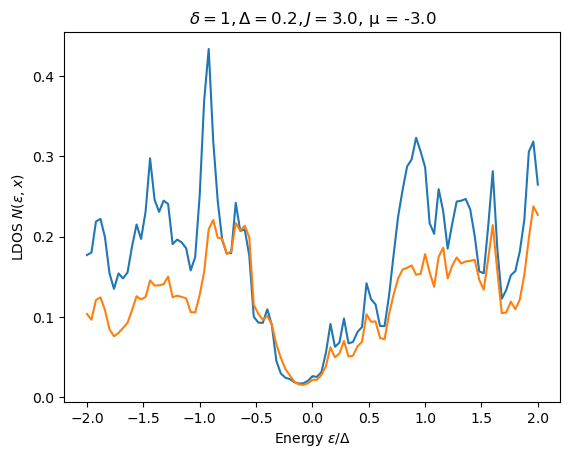

LDOS: 100%|██████████| 51/51 [00:07<00:00,  6.68ε/s]


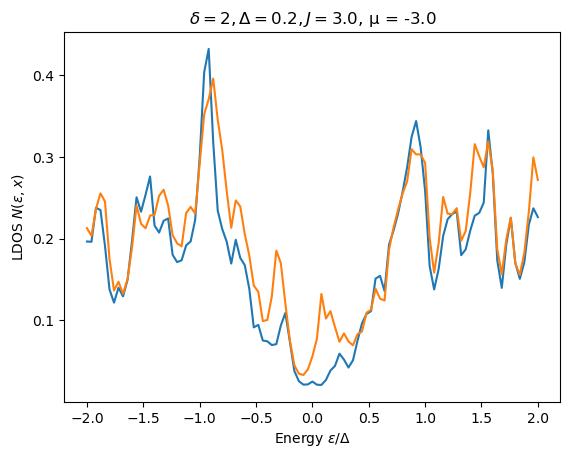

LDOS: 100%|██████████| 51/51 [00:07<00:00,  7.02ε/s]


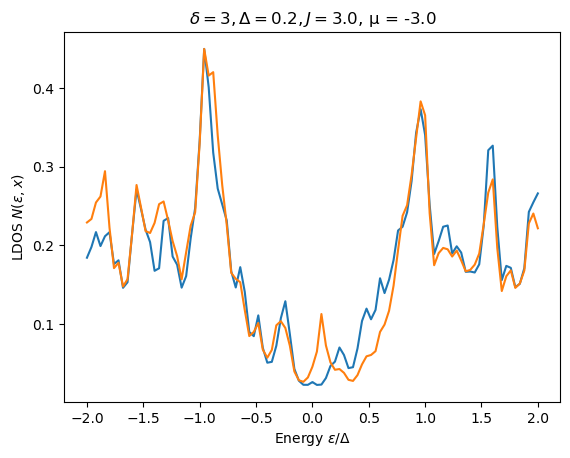

LDOS: 100%|██████████| 51/51 [00:07<00:00,  6.77ε/s]


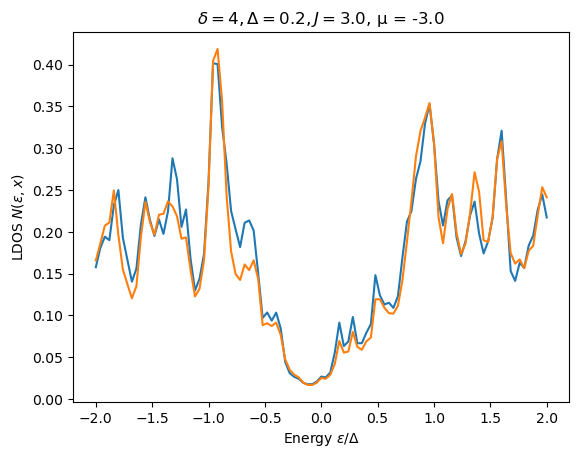

LDOS: 100%|██████████| 51/51 [00:07<00:00,  6.99ε/s]


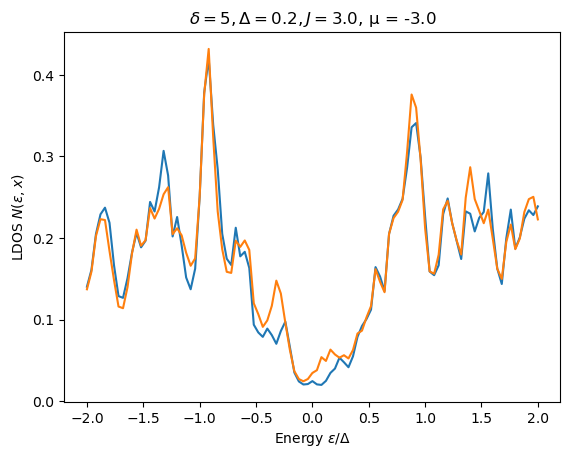

LDOS: 100%|██████████| 51/51 [00:07<00:00,  6.46ε/s]


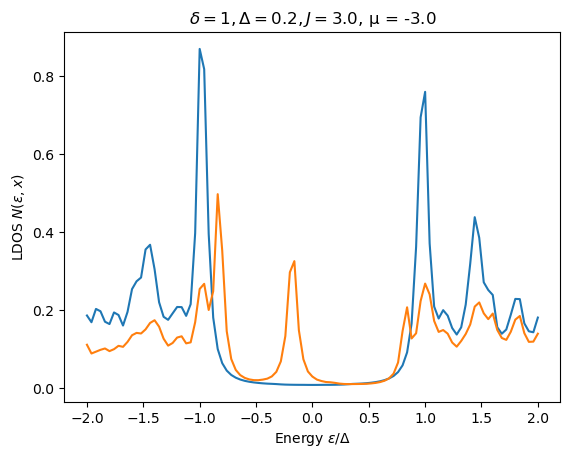

LDOS: 100%|██████████| 51/51 [00:07<00:00,  6.67ε/s]


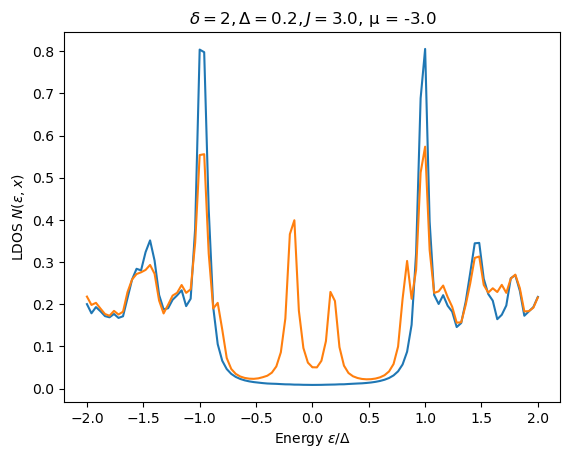

LDOS: 100%|██████████| 51/51 [00:07<00:00,  6.59ε/s]


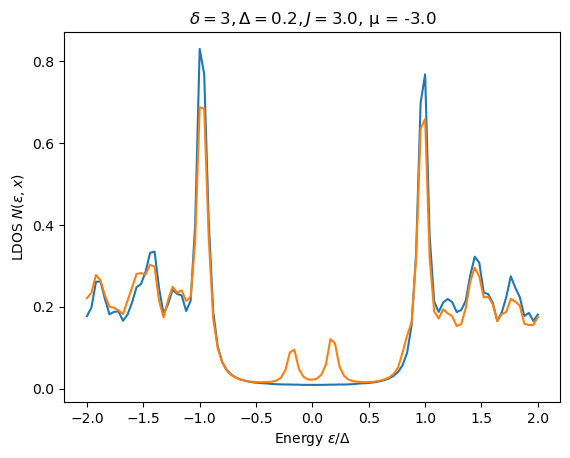

LDOS: 100%|██████████| 51/51 [00:07<00:00,  6.66ε/s]


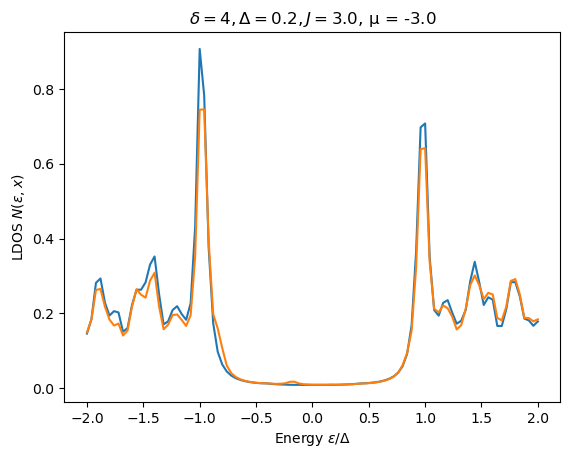

LDOS: 100%|██████████| 51/51 [00:07<00:00,  6.98ε/s]


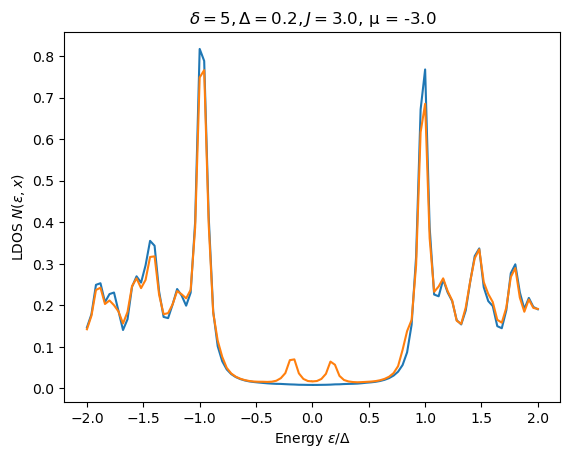

In [21]:
Δ0 = 0.20
J0 = 3.00
µ = -3.00

for d in [d_x, d_y, d_xy]:
    for δ in [1,2,3,4,5]:
        plot_ysr(d, δ, Δ0, J0, μ)

### Conclusions
- If we want a clear YSR state for 3 lattice sites away, then we need to go down to $\mu = -3t$. Otherwise, the YSR state is very closely localized, and becomes visible only at the nearest neighbour or next-nearest neighbor. Since a YSR state that affects DOS over a larger area likely also affects RKKY more significantly, I set $\mu = -3t$. For chiral p-wave, an effect can be seen even further away, at $\delta = 5a$.
- If we want clear gap structure for $p_x$ superconductors at that $\mu$ value, we need to go up to $\Delta = 0.2t$. (For e.g. $\mu = -2t$, we could get away with $\Delta = 0.1t$.)
- For a significant DOS effect at $\delta = 3a$, we need to choose $J = 3t$. We see something for $J = 2t$ as well, but it's much more moderate and dies off more quickly.

## RKKY interactions

### Parameter choices


After some parameter tuning for YSR states, we landed on these parameters:

- $J = 3t$ for the coupling to the classical spins;
- $\Delta = 0.2t$ for the superconducting gap;
- $\mu = -3t$ for the chemical potential.

Let's hard-code these for further use below.

In [6]:
J0 = 3.0
Δ0 = 0.2
μ = -3.0

### RKKY calculator

In [9]:
RKKY = {}

def calc_rkky(d):
    D = pwave(d)

    i10 = 20
    i11 = Ly // 2
    for δ in trange(1, Lx - 2*i10 + 1):
        i20 = i10 + δ
        i21 = i11

        # Construct the ferromagnetic Hamiltonian.
        system = Hamiltonian(lattice)
        with system as (H, Δ, V):
            for i in lattice.sites():
                if i[0] == i10 and i[1] == i11:
                    H[i, i] = -μ * σ0 + (J0/2) * σ3
                elif i[0] == i20 and i[1] == i21:
                    H[i, i] = -μ * σ0 + (J0/2) * σ3
                else:
                    H[i, i] = -μ * σ0

            for i, j in lattice.bonds():
                Δ[i, j] = -Δ0 * D(i, j)
                H[i, j] = -1.0 * σ0

        # Calculate the corresponding free energy.
        E_fm = free_energy(system)

        # Construct the antiferromagnetic Hamiltonian.
        with system as (H, Δ, V):
            for i in lattice.sites():
                if i[0] == i20 and i[1] == i21:
                    H[i, i] = -μ * σ0 - (J0/2) * σ3

        # Calculate the corresponding free energy.
        E_afm = free_energy(system)

        # Calculate the RKKY coupling.
        J_rkky = E_fm - E_afm

        # Print the results in CSV format.
        print(f"{δ}, {J_rkky}")

        # Update the global dict.
        RKKY[(d, δ)] = J_rkky

    print(RKKY)

Let's now do some RKKY calculations for the selected parameter sets. Sticking to unitary superconductors for now, and let's see where that leads us...

In [12]:
for d in ["e_z * p_x", "e_z * p_y", "e_z * (p_x + jp_y)"]:
    calc_rkky(d)

1, -0.04977802723442437


Note that over, everything got saved to the dictionary `RKKY`. This means that below, we can construct a `DataFrame` from this dictionary, and use that to generate plots.

In [11]:
print(RKKY)

{('e_z * p_x', 1): -0.04977802723442437}
